# Surprise House Price Prediction

We will divide the solution into the following sections:
- Data understanding and Data exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Data Exploration

Let's read the data and understand the columns with the help of dictionary provided.

And then let's explore the data to find the target variable and the correlation with other independent variables

In [2]:
#importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns',None)

# import warnings
# warnings.filterwarnings('ignore')

In [3]:
house_price = pd.read_csv('./train.csv')
house_price

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [4]:
house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
with open('./data_description.txt', 'r') as text:
    defs = text.read()
    print(defs)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From the info of the house price data we can observe there are some null-values which needs to be handled. 

Although we will deal with the imputing/handling the null-values later, but for now let's study the null values and their percentage.

In [7]:
house_price.isna().sum().sort_values(ascending=False)[house_price.isna().sum()!=0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [8]:
(house_price.isna().sum()/house_price.isna().count()).sort_values(ascending=False)[house_price.isna().sum()!=0]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

If you observe the null values in features/columns like PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu etc... we might think there are a lot of null values. But if we check the definition of columns we see that actually those columns have NA values which correponded to a different category having some meaning.

For example in case of  <p>
PoolQC      -  NA means No Pool <br>
MiscFeature -  NA means no miscellaneous features <br>
Alley       -  NA means No Alley access <br>
Fence       -  NA means No Fence <br>
FirePlaceQu -  NA means No Fireplace<br>
etc...
</p>
So we shouldn't drop these columns, instead we should replace the null values with some non-null value representing that category.

Let's make that change in the Data fixing/cleaning part

In [9]:
# Going forward we will be performing analysis on the independent features/variables, 
# so its necessary that we categorize them according to their types so that appropriate analysis and charts can be used and done
numeric_features = list(house_price.dtypes[(house_price.dtypes== "int64") |(house_price.dtypes == float)].index)
categoric_features = list(house_price.dtypes[(house_price.dtypes== object)].index)

In [10]:
print('{} -> are numeric cols & count ={}'.format(numeric_features,len(numeric_features)) )
print(categoric_features,'-> are categorical cols & count =',len(categoric_features))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] -> are numeric cols & count =38
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Ga

From the data dictionary of features/columns, it can be observed that even though some features are represented as numbers(numeric type), they are actually categories. 
For example features like Fireplaces (Number of fireplaces in a house), Garage Cars etc... these variables are discrete variables

In [11]:
example_feat = ['Fireplaces','TotRmsAbvGrd','FullBath','GarageCars'] #Just considering only few variables for representation
for feat in example_feat:
    print('Number of unique values for feature {} = {} & unique values are {}'.format(feat,house_price[feat].nunique(), house_price[feat].unique() ) )   

Number of unique values for feature Fireplaces = 4 & unique values are [0 1 2 3]
Number of unique values for feature TotRmsAbvGrd = 12 & unique values are [ 8  6  7  9  5 11  4 10 12  3  2 14]
Number of unique values for feature FullBath = 4 & unique values are [2 1 3 0]
Number of unique values for feature GarageCars = 5 & unique values are [2 3 1 0 4]


We have already divided the variables based on data types like if its object, then it is considered as Categorical.
But we can divide numerical variables as well. These can be further refined as continuous variables, dicrete and temporal (year-type) variables

Since the discrete variables will have unique values, lets have condition to check the number of unique values present in a column are greater than a threshold (say 25) then we can consider them as continuous type otherwise discrete

In [12]:
discrete_feat = [feature for feature in numeric_features if house_price[feature].nunique() < 25 ]
print('Discrete features count: {} & features are {}'.format(len(discrete_feat), discrete_feat))

Discrete features count: 18 & features are ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


Above categorization based on the number of unique values might work to split most of the discrete value from continuous values, but everything has its con. 

For example, PoolArea which means Area of the Pool, is a continuous feature, but it was wrongly categorized as discrete feature. And the same can be observed for some more features as well.

In [13]:
wrong_discrete_feat = ['LowQualFinSF','3SsnPorch','PoolArea','MiscVal']

In [14]:
discrete_feat = list(set(discrete_feat)-set(wrong_discrete_feat)) 
print('Discrete features count: {} & features are {}'.format(len(discrete_feat), discrete_feat))

Discrete features count: 14 & features are ['FullBath', 'BsmtFullBath', 'MSSubClass', 'GarageCars', 'TotRmsAbvGrd', 'YrSold', 'OverallQual', 'BsmtHalfBath', 'BedroomAbvGr', 'OverallCond', 'HalfBath', 'KitchenAbvGr', 'MoSold', 'Fireplaces']


In [15]:
# Let's get the continuous features, excluding the Id & SalePrice columns
continuous_feat = list(set(numeric_features)-set(discrete_feat) - set(["Id",'SalePrice']) ) 
# cont_vars = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']
print('Continuous features count: {} & features are {}'.format(len(continuous_feat), continuous_feat))

Continuous features count: 22 & features are ['YearBuilt', 'EnclosedPorch', 'GarageYrBlt', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'OpenPorchSF', 'GarageArea', 'MiscVal', 'WoodDeckSF', 'PoolArea', 'LotArea', '3SsnPorch', 'LotFrontage', 'YearRemodAdd', 'TotalBsmtSF', 'BsmtFinSF2', 'ScreenPorch']


Now that we have divided our data into segments like Numeric( continuous & discrete) & categorical.

Let's try to analyze some relation if any they posses with the target variable 'SalePrice'

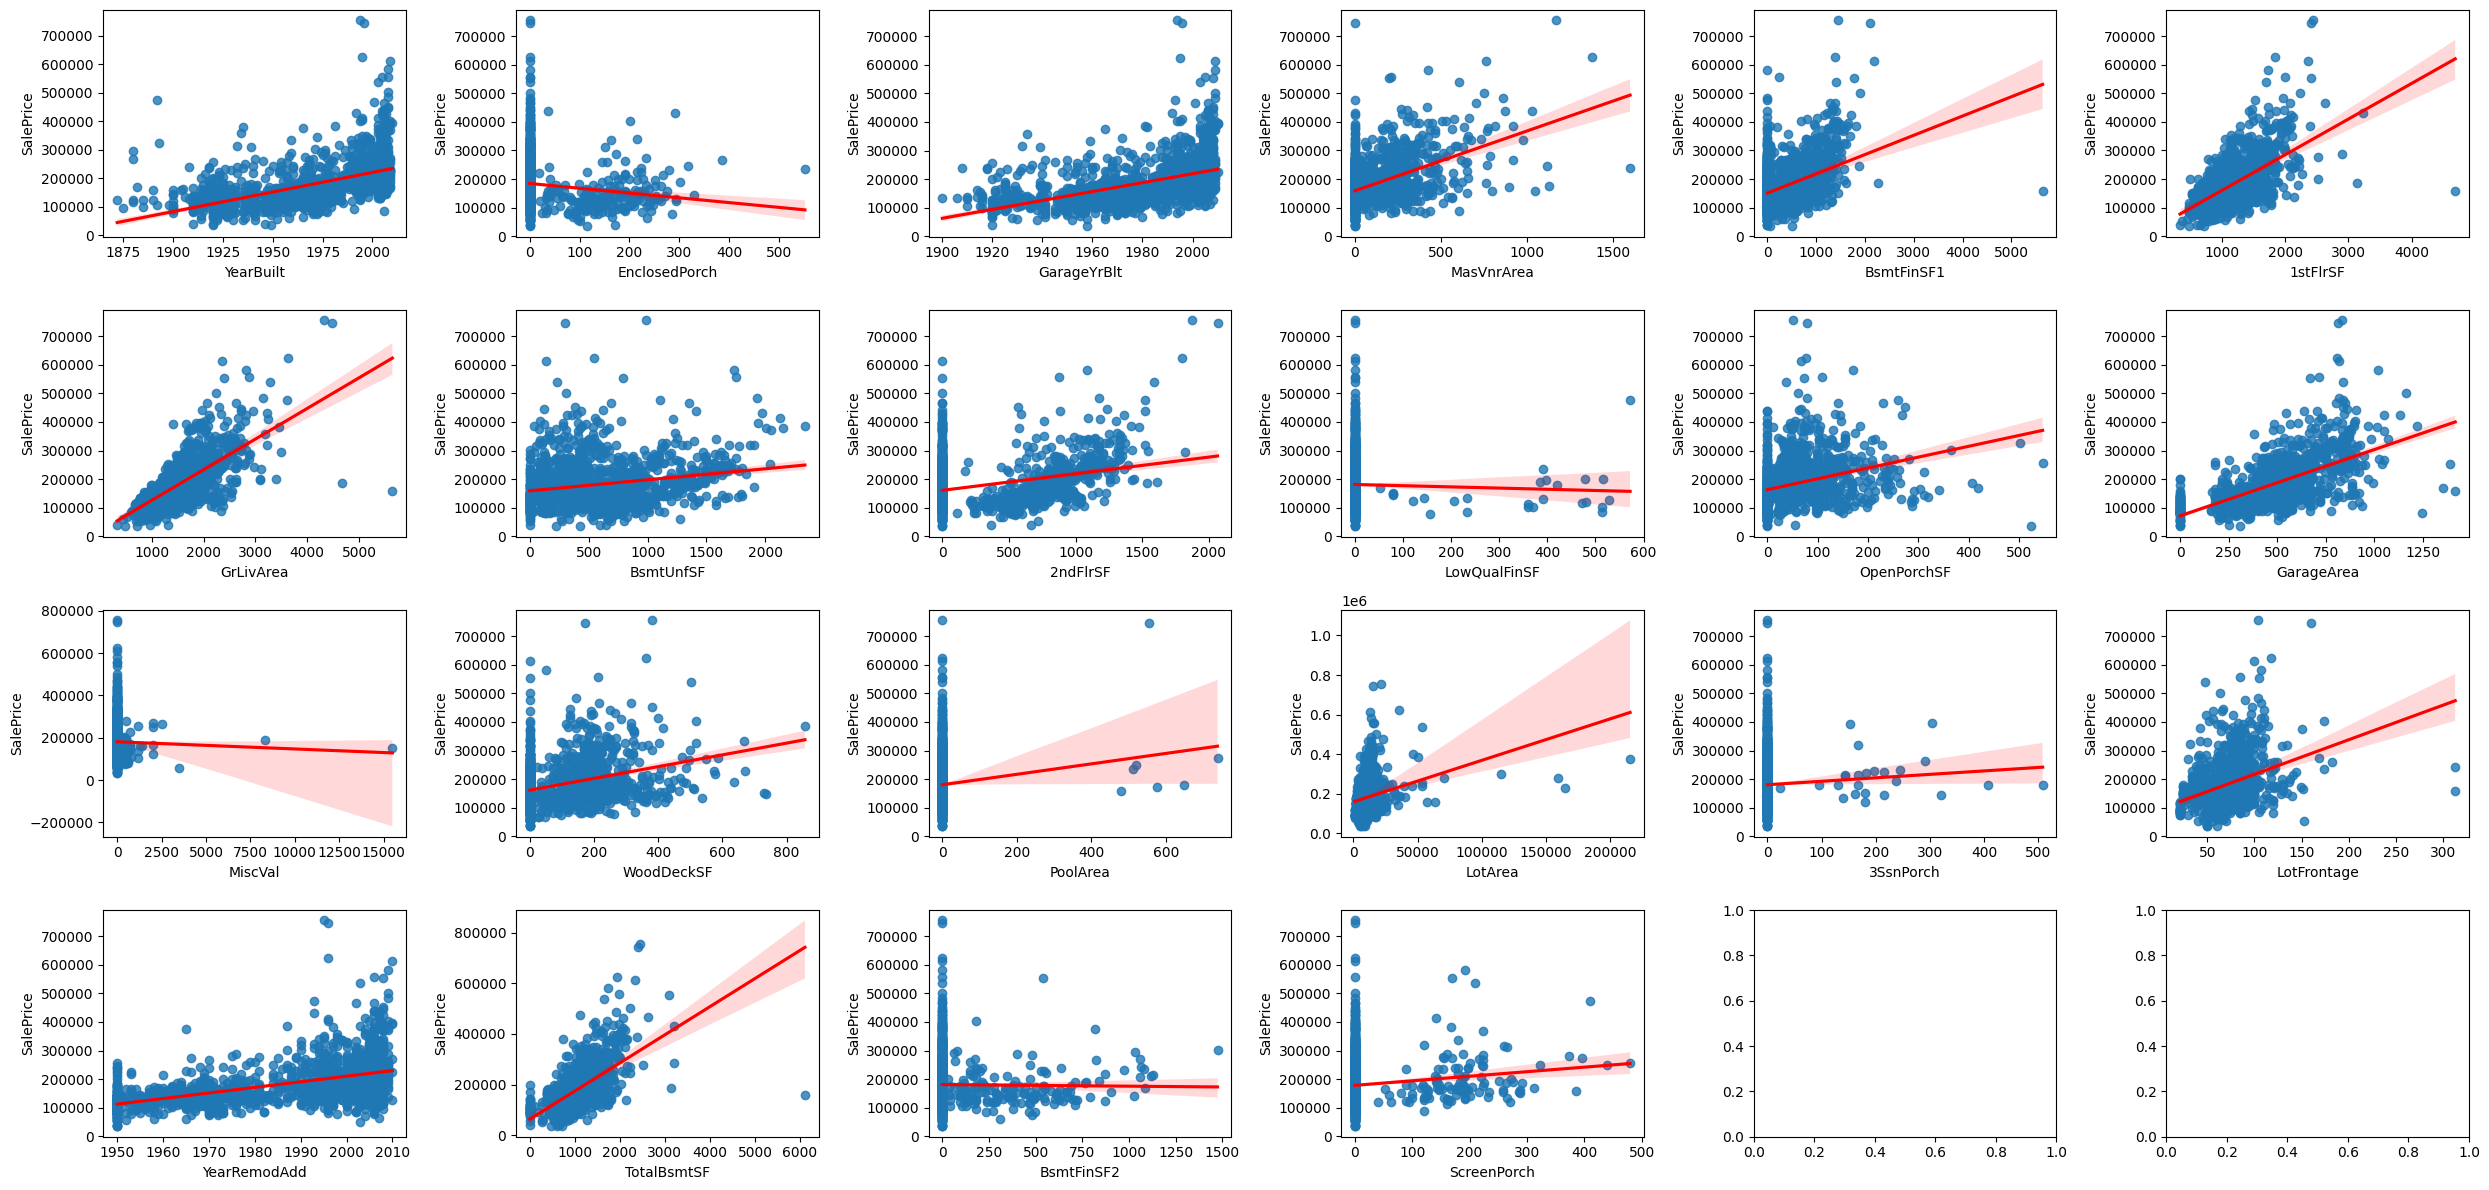

In [16]:
# Starting off with the plots for continuous features vs the sale price. We will draw scatter plots
#Let's plot graphs for these continuous features vs SalePrice.

nr_rows = 4
nr_cols = 6

#Instantiate the subplot object
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(25,12))

#loop through the numeric columns to identify the outliers
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(continuous_feat):
            #sns.boxplot(x='loan_status',y='open_acc',data = loan)
            sns.regplot(y='SalePrice', x=continuous_feat[i], data=house_price, ax = axs[r][c], scatter=True, line_kws=dict(color='r') )

#show the subplots in a tight layout
plt.tight_layout()    
plt.show()

In [17]:
high0_feat= ['MiscVal','PoolArea','3SsnPorch','LowQualFinSF']
for feature in high0_feat:
    print(house_price[feature].value_counts())

MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64
PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64
3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: count, dtype: int64
LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1


Insights:

1. We can observe that features like MiscVal,PoolArea, 3SsnPorch, LowQualFinSF which have a lot of 0 values and so they are almost useless for model building.
2. Features like BsmtUnfSF, EnclosedPorch, BsmtFinSF2, ScreenPorch have almost negligible affect on the SalePrice
3. GarageYrBlt, YearRemodAdd, WoodDeckSF, YearBuilt, OpenPorchSF, 2ndFlrSF have decent relationship with SalePrice.
4. Of all the features, we can observe good linearity with TotalBsmtSF, 1stFlrSF, BsmtFinSF1, GrLivArea, GarageArea, LotArea, LotFrontage, MasVnrArea.

In [18]:
print(discrete_feat)

['FullBath', 'BsmtFullBath', 'MSSubClass', 'GarageCars', 'TotRmsAbvGrd', 'YrSold', 'OverallQual', 'BsmtHalfBath', 'BedroomAbvGr', 'OverallCond', 'HalfBath', 'KitchenAbvGr', 'MoSold', 'Fireplaces']


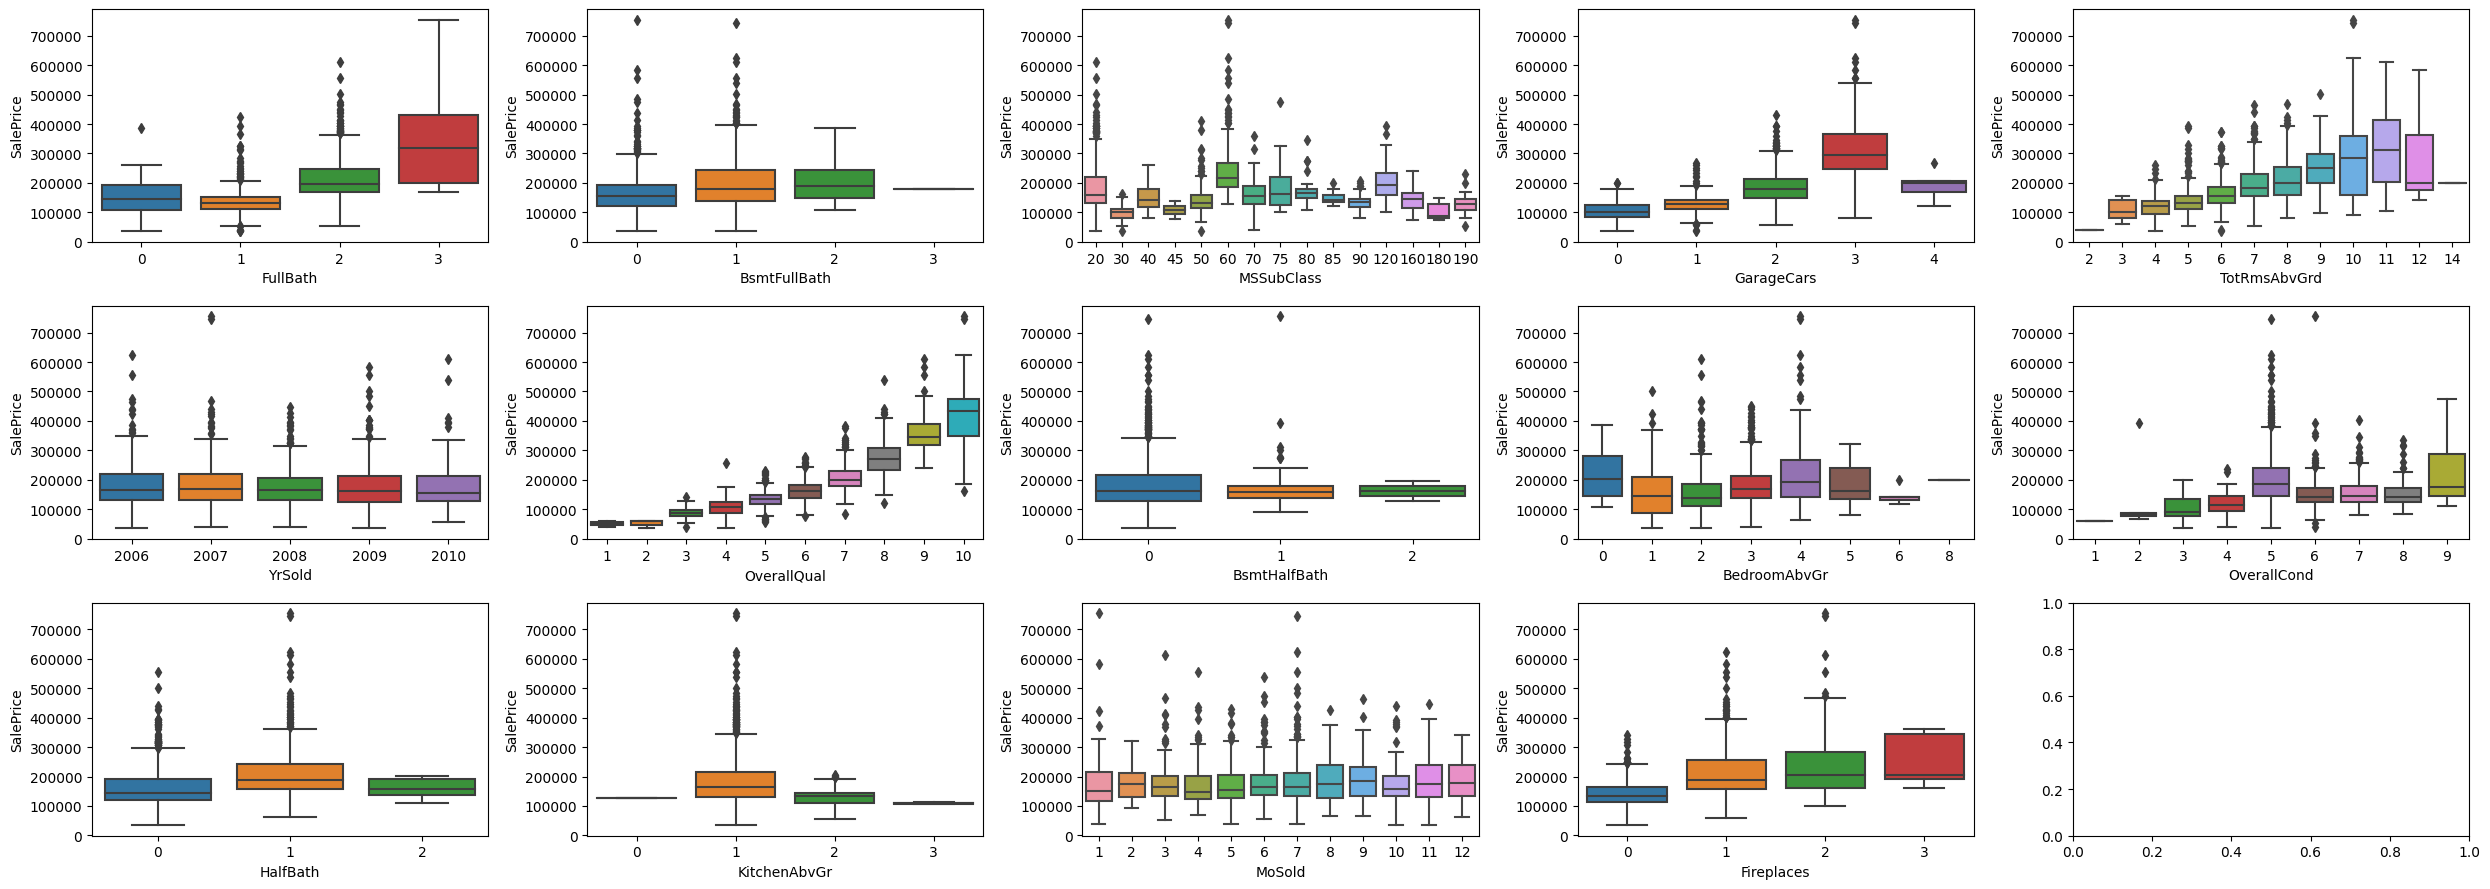

In [19]:
#Let's plot graphs for these discrete features vs SalePrice.

nr_rows = 3
nr_cols = 5

#Instantiate the subplot object
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(25,9))

#loop through the numeric columns to identify the outliers
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(discrete_feat):
            #sns.boxplot(x='loan_status',y='open_acc',data = loan)
            sns.boxplot(y='SalePrice', x=discrete_feat[i], data=house_price, ax = axs[r][c])

#show the subplots in a tight layout
plt.tight_layout()    
plt.show()


Inferences:

1. There is a monotonically increasing relationship b/w OverallQual vs SalePrice and as the overallQual increases the variance in SalePrice also increases
2. Initially as the OverallCond increases, median SalePrice increases until a certain point and then almost flattens out as the OverallCond increases
3. There is a slight increase in the SalePrice as the BsmtFullBath value increases
4. As the total rooms above ground (TotRmsAbvGrd) incrased, median SalePrice increased
5. Same is with the case of Fireplaces vs SalePrice
6. Relationship b/w MSSubClass, LowQualFinSF, 3SsnPorch, PoolArea, MiscVal and SalePrice is random
7. There is no change in SalePrice observed based on the Month Sold, YrSold, BsmtHalfBath, HalfBath, KitchenAbvGr, BedroomAbvGr

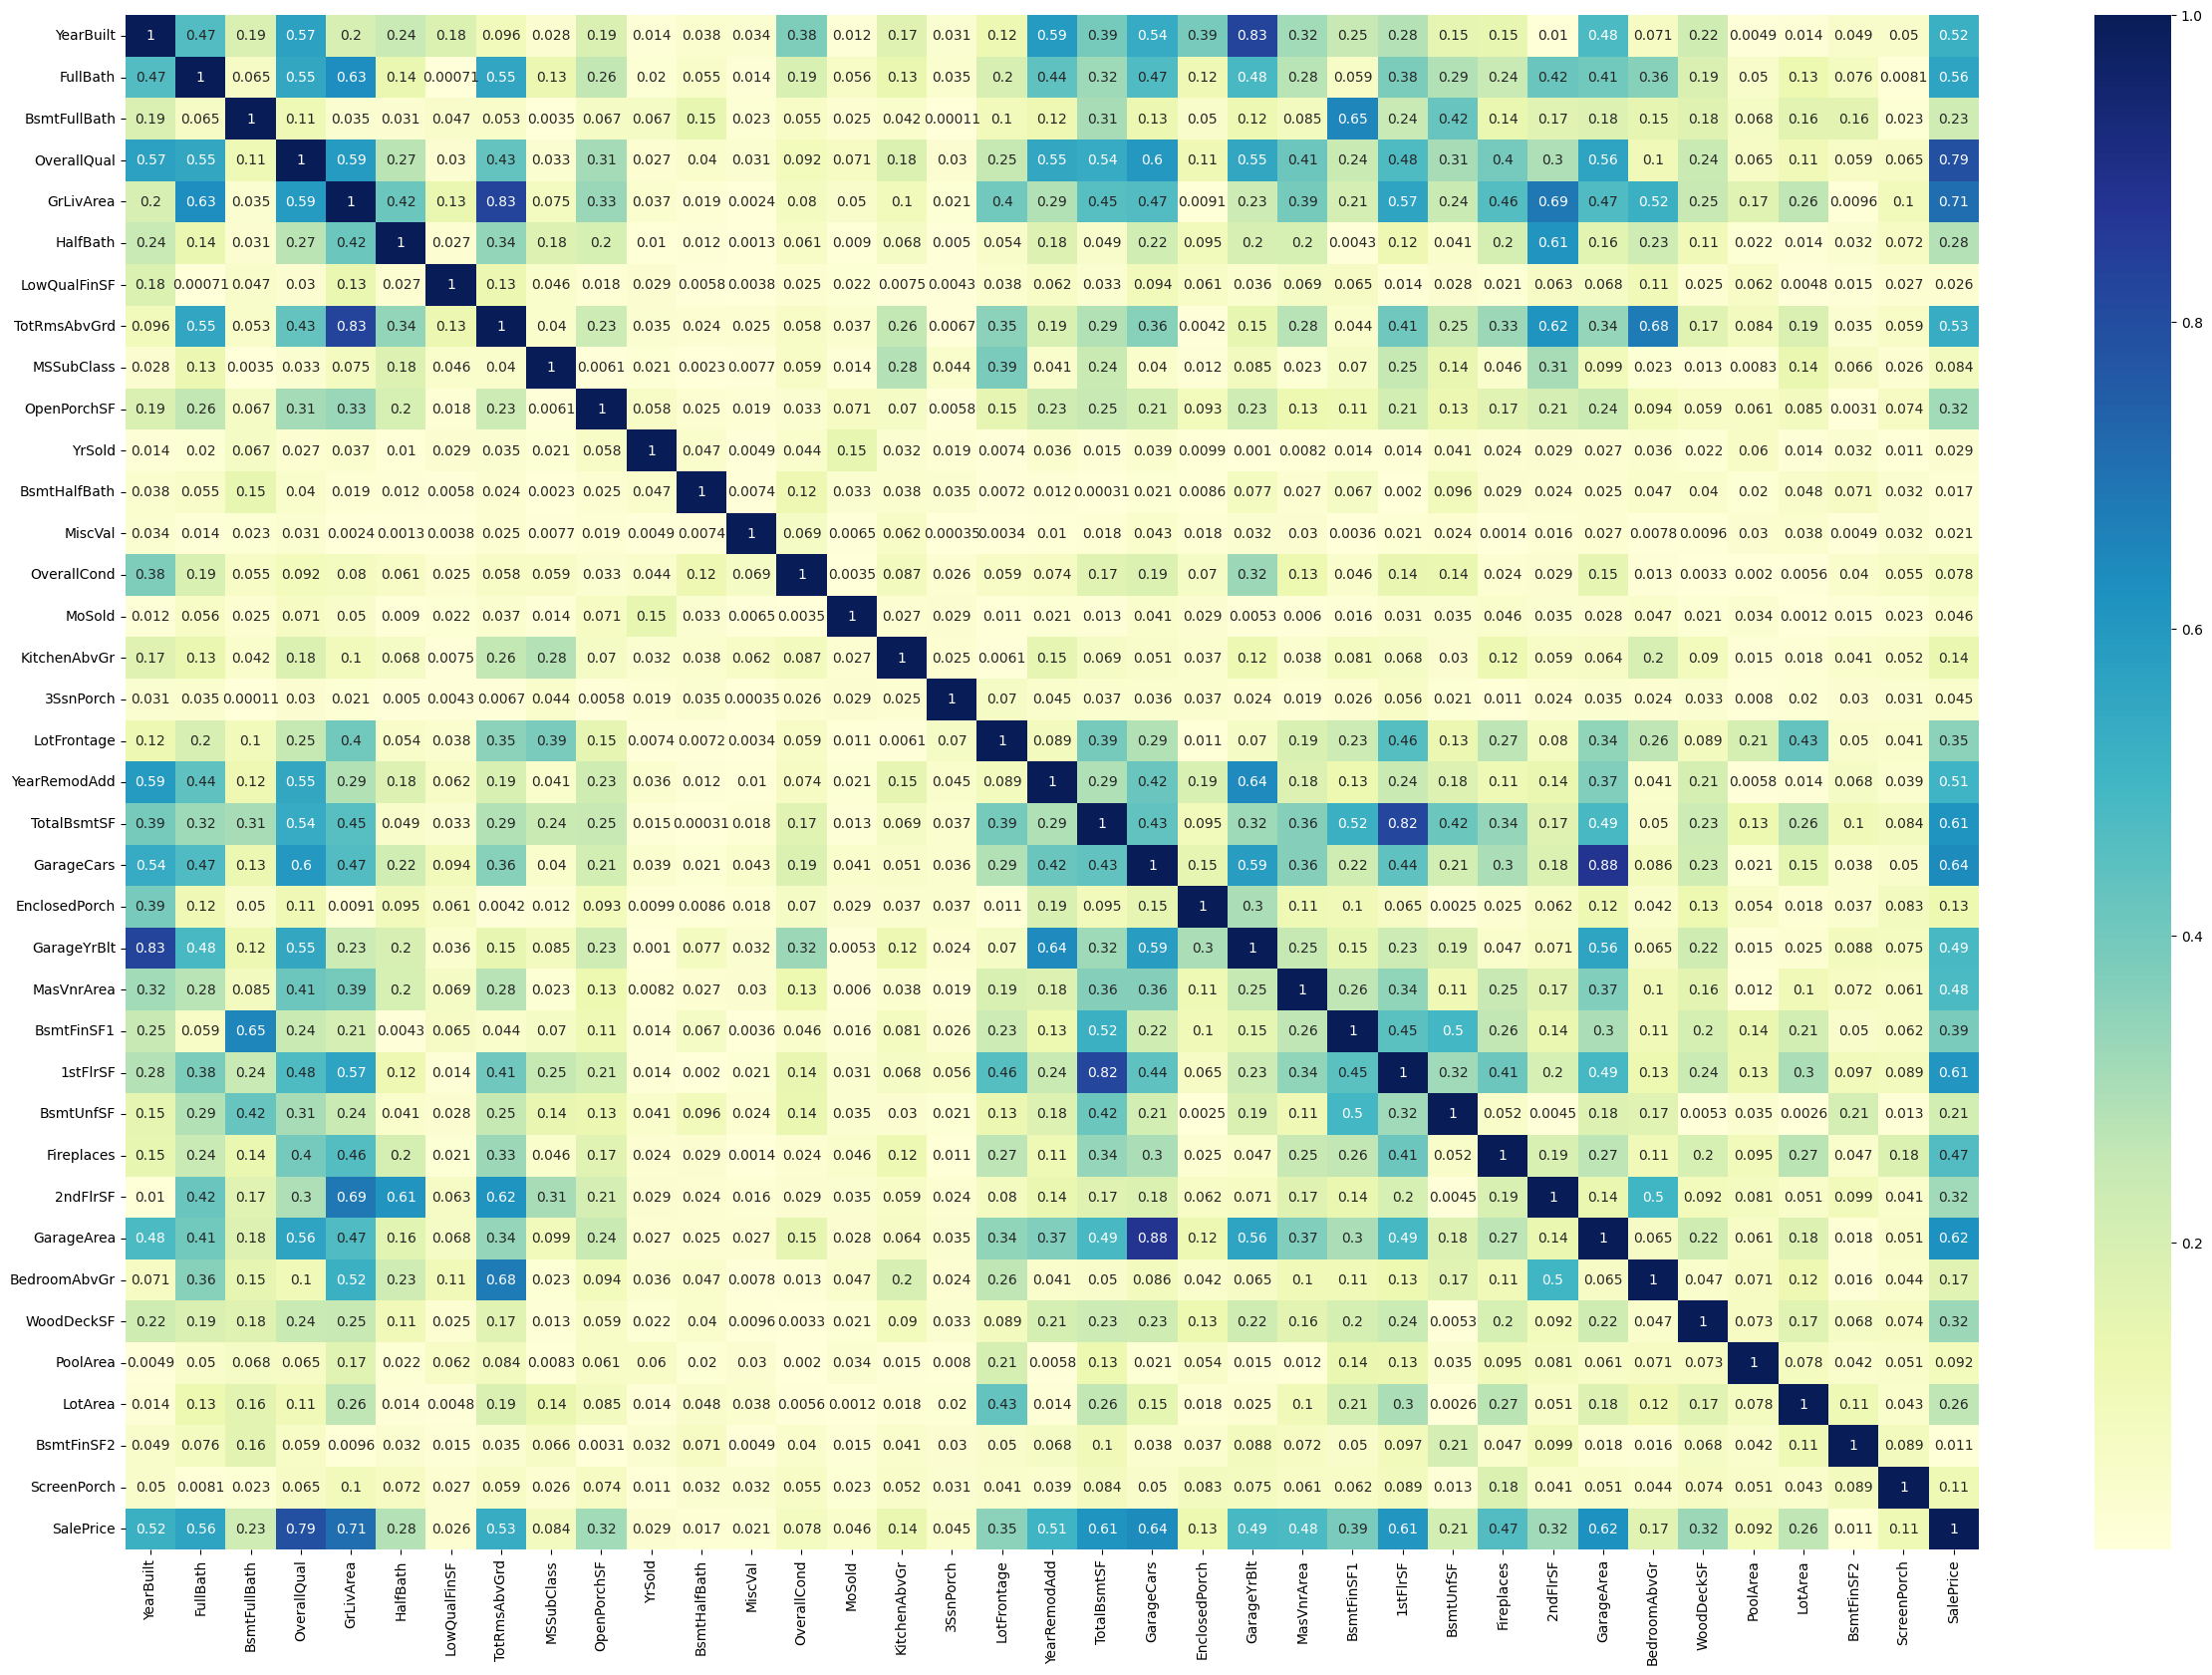

In [20]:
# Since we want to perform Lasso & Ridge regression on the whole features to see how they handle or penalize the features, we will not manually drop any columns unless necessary
# Like dropping the Id column, dropping the columns which have high correlation, dropping the columns once we have derived other columns from it

plt.figure(figsize=(30,20))
sns.heatmap(house_price[list(set(numeric_features)-set(['Id','SalePrice']))+['SalePrice']].corr().abs(),cmap='YlGnBu',annot=True)
plt.show()

As a general thumb rule, we will consider the features having absolute value greater than 0.6 as highly correlated

Features having high correlation with each other 
1. BsmtFullBath & BsmtFinSF1    -   0.65
2. TotRmsAbvGrd & GrLivArea     -   0.83
3. FullBath & GrLivArea         -   0.63
4. 2ndFlrSF & GrLivArea         -   0.69
5. TotRmsAbvGrd & BedroomAbvGr  -   0.68
6. TotRmsAbvGrd & 2ndFlrSF      -   0.62
6. TotalBsmtSF & 1stFlrSF       -   0.82
7. GarageYrBlt & YearRemodAdd   -   0.64
8. GarageCars & OverallQual     -   0.6
9. GarageYrBlt & YrBlt          -   0.83
10. GarageArea & GarageCars     -   0.88
11. HalfBath & 2ndFlrSF         -   0.61
---

Out of these, only those features which are absolutely needs to be dropped will be dropped based on the correlation they have with target variable 'SalePrice'

features_to_drop =['TotRmsAbvGrd','BsmtFullBath','2ndFlrSF','1stFlrSF']

---
There are also a lot of Year features, but as we know the 'SalePrice' of a property depends more on the Age of the property than 'YrBuilt', 'YrSold', 'GarageYrBlt', 'YearRemodAdd'. Once we create the feature 'Age' which will be the difference of 'YrSold'-'YrBuilt' then we can remove other Year variables as well

yr_features_to_drop = ['YrBuilt', 'YrSold', 'GarageYrBlt', 'YearRemodAdd']

### Data Cleaning & Fixing Rows/Columns

In [21]:
house_price['Age'] = house_price['YrSold']-house_price['YearBuilt']
house_price

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

As observed in the above section, there are some null values, let's start with studying such columns

In [22]:
# Let's fill the columns having NA values in definition with "none" string
# The following columns, from the data dictionary has values meaning for None/NA as mentioned above.

feautures_with_na_meaning = ['Alley','MasVnrType','BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature',]
len(feautures_with_na_meaning)

15

In [23]:
for i in feautures_with_na_meaning:
    house_price[i].fillna("none",inplace=True)

In [24]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
# As we can see, most of the categorical variables are now almost null value free. Let's check the null values again
house_price.isna().sum()[house_price.isna().sum()!=0].sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Electrical       1
dtype: int64

In [26]:
checkpoint_house_price =  house_price.copy()

As it can be observed that there are still null values present in few of the features. Out of many ways to treating the null values in numerical type, we can either drop off all rows containing those columns or we can replace the null values. 
 
Since we don't have much data available with us, we should go with replacing the null values with median values

Since we want the test data to be unseen, we have to first do the test-train split & then replace the na values with the median obtained from the median of the train data of respective features. But for the sake of this assignment we will oversee this issue.

Except Electrical all other column types are numerical in nature. So instead of dropping the rows with null values, we can try to treat the data by using mode/median of those columns.

In [27]:
# Since there is only one record with na in Electrical column, we drop the row with na value in Electrical column
# house_price = house_price[~house_price['Electrical'].isna()]


In [28]:
print((house_price['GarageYrBlt']).median(), (house_price['LotFrontage']).median(),house_price['MasVnrArea'].median())


1980.0 69.0 0.0


Examined the median of "GarageYrBlt" variable because we want the median value to be a integer rather than a float with 0.5 since its a year variable. And other variables since they are continuous variables, its fine even if we don't have a integer value as median. <br>
For "GarageYrBlt","LotFrontage" & "MasVnrArea" we will proceed to replace the na values with the median

In [29]:
house_price["GarageYrBlt"].fillna(house_price["GarageYrBlt"].median(), inplace=True)
house_price["MasVnrArea"].fillna(house_price["MasVnrArea"].median(), inplace=True)
house_price["LotFrontage"].fillna(house_price["LotFrontage"].median(), inplace=True)

In [30]:
#Lets check for null values since we have treated most of them
house_price.isna().sum().sort_values(ascending=False).head()

Electrical     1
GarageCars     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
dtype: int64

In [31]:
house_price.dropna(inplace=True)

In [32]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallCond  

In [33]:
# Id column is not required for our analysis, so droping the Id column & resetting the index
house_price.drop("Id", axis=1, inplace=True)
house_price.reset_index(drop=True,inplace=True)
house_price

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave  none      Reg   
1             20       RL         80.0     9600   Pave  none      Reg   
2             60       RL         68.0    11250   Pave  none      IR1   
3             70       RL         60.0     9550   Pave  none      IR1   
4             60       RL         84.0    14260   Pave  none      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454          60       RL         62.0     7917   Pave  none      Reg   
1455          20       RL         85.0    13175   Pave  none      Reg   
1456          70       RL         66.0     9042   Pave  none      Reg   
1457          20       RL         68.0     9717   Pave  none      Reg   
1458          20       RL         75.0     9937   Pave  none      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1455         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1456         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1457         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1458         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1454       Norm     1Fam     2Story            6            5       1999   
1455       Norm     1Fam     1Story            6            6       1978   
1456       Norm     1Fam     2Story            7            9       1941   
1457       Norm     1Fam     1Story            5            6       1950   
1458       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       none   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       none   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1454          2000     Gable  CompShg     VinylSd     VinylSd       none   
1455          1988     Gable  CompShg     Plywood     Plywood      Stone   
1456          2006     Gable  CompShg     CemntBd     CmentBd       none   
1457          1996       Hip  CompShg     MetalSd     MetalSd       none   
1458          1965     Gable  CompShg     HdBoard     HdBoard       none   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


In [34]:
df_checkpoint = house_price.copy()

In [35]:
yr_features_to_drop = ['YearBuilt', 'YrSold', 'GarageYrBlt', 'YearRemodAdd']
features_to_drop =['TotRmsAbvGrd','BsmtFullBath','2ndFlrSF','1stFlrSF']  # having high correlation with the other features

house_price.drop(yr_features_to_drop+features_to_drop,axis=1, inplace=True)
house_price

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave  none      Reg   
1             20       RL         80.0     9600   Pave  none      Reg   
2             60       RL         68.0    11250   Pave  none      IR1   
3             70       RL         60.0     9550   Pave  none      IR1   
4             60       RL         84.0    14260   Pave  none      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454          60       RL         62.0     7917   Pave  none      Reg   
1455          20       RL         85.0    13175   Pave  none      Reg   
1456          70       RL         66.0     9042   Pave  none      Reg   
1457          20       RL         68.0     9717   Pave  none      Reg   
1458          20       RL         75.0     9937   Pave  none      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1455         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1456         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1457         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1458         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle  \
0          Norm     1Fam     2Story            7            5     Gable   
1          Norm     1Fam     1Story            6            8     Gable   
2          Norm     1Fam     2Story            7            5     Gable   
3          Norm     1Fam     2Story            7            5     Gable   
4          Norm     1Fam     2Story            8            5     Gable   
...         ...      ...        ...          ...          ...       ...   
1454       Norm     1Fam     2Story            6            5     Gable   
1455       Norm     1Fam     1Story            6            6     Gable   
1456       Norm     1Fam     2Story            7            9     Gable   
1457       Norm     1Fam     1Story            5            6       Hip   
1458       Norm     1Fam     1Story            5            6     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     CompShg     MetalSd     MetalSd       none         0.0        TA   
2     CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     CompShg     Wd Sdng     Wd Shng       none         0.0        TA   
4     CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   
...       ...         ...         ...        ...         ...       ...   
1454  CompShg     VinylSd     VinylSd       none         0.0        TA   
1455  CompShg     Plywood     Plywood      Stone       119.0        TA   
1456  CompShg     CemntBd     CmentBd       none         0.0        Ex   
1457  CompShg     MetalSd     MetalSd       none         0.0        TA   
1458  CompShg     HdBoard     HdBoard       none         0.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTil       TA       Gd           No          ALQ   
4           TA      PConc       Gd       TA           Av          GLQ   
...        .

## Data Analysis

As observed earlier there are features which don't provide much insights on the sale price of the house.

1. In continuous features MiscVal, PoolArea, 3SsnPorch, LowQualFinSF didn't have any affect on the sale price.
2. Its also observed that features like BsmtUnfSF, EnclosedPorch, BsmtFinSF2, ScreenPorch have almost negligible affect on the SalePrice.
3. GarageYrBlt, YearRemodAdd, WoodDeckSF, YearBuilt, OpenPorchSF, 2ndFlrSF have decent relationship with SalePrice.

But we should see some relationship between saleprice and the yearbuilt/remodeled.
Technically SalePrice should have some affect on the age of the house/property. We derived a feature, "Age" of the property which is difference of YearBuilt and YrSold

In [36]:
# house_price['Age'] = house_price['YrSold']-house_price['YearBuilt']
house_price.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence'

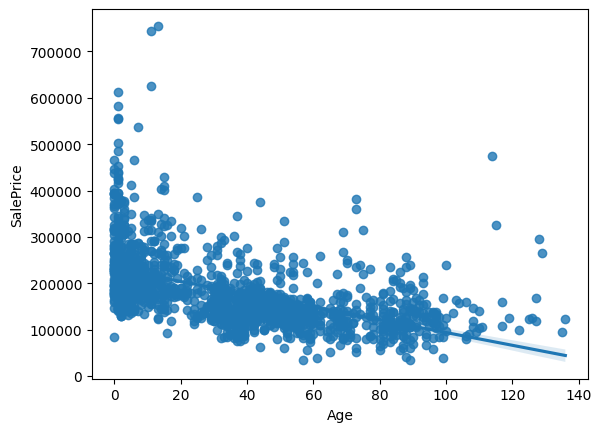

In [37]:
sns.regplot(x='Age',y='SalePrice',data=house_price, scatter=True)
plt.show()

In [38]:
print(continuous_feat)
print(numeric_features)

['YearBuilt', 'EnclosedPorch', 'GarageYrBlt', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'OpenPorchSF', 'GarageArea', 'MiscVal', 'WoodDeckSF', 'PoolArea', 'LotArea', '3SsnPorch', 'LotFrontage', 'YearRemodAdd', 'TotalBsmtSF', 'BsmtFinSF2', 'ScreenPorch']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [39]:
numeric_features_new = list(house_price.dtypes[(house_price.dtypes== "int64") |(house_price.dtypes == float)].index)
numeric_features_new

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'Age']

In [40]:
for feat in numeric_features_new:
    print('feature has {} values, {}'.format(house_price[feat].nunique(),feat))

feature has 15 values, MSSubClass
feature has 110 values, LotFrontage
feature has 1072 values, LotArea
feature has 10 values, OverallQual
feature has 9 values, OverallCond
feature has 327 values, MasVnrArea
feature has 637 values, BsmtFinSF1
feature has 144 values, BsmtFinSF2
feature has 780 values, BsmtUnfSF
feature has 721 values, TotalBsmtSF
feature has 24 values, LowQualFinSF
feature has 861 values, GrLivArea
feature has 3 values, BsmtHalfBath
feature has 4 values, FullBath
feature has 3 values, HalfBath
feature has 8 values, BedroomAbvGr
feature has 4 values, KitchenAbvGr
feature has 4 values, Fireplaces
feature has 5 values, GarageCars
feature has 441 values, GarageArea
feature has 274 values, WoodDeckSF
feature has 202 values, OpenPorchSF
feature has 120 values, EnclosedPorch
feature has 20 values, 3SsnPorch
feature has 76 values, ScreenPorch
feature has 8 values, PoolArea
feature has 21 values, MiscVal
feature has 12 values, MoSold
feature has 663 values, SalePrice
feature has 

In [41]:
discrete_feat_new = [feature for feature in numeric_features_new if house_price[feature].nunique() < 25 ]
print('Discrete features count: {} & features are {}'.format(len(discrete_feat_new), discrete_feat_new))

Discrete features count: 15 & features are ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [42]:
discrete_feat_new = list(set(discrete_feat_new)-set(['LowQualFinSF','3SsnPorch','PoolArea','MiscVal']))
continuous_feat_new = list(set(numeric_features_new)-set(discrete_feat_new))
print('Discrete features count: {} & features are {}'.format(len(discrete_feat_new), discrete_feat_new))
print('Continuous features count: {} & features are {}'.format(len(continuous_feat_new), continuous_feat_new))

Discrete features count: 11 & features are ['FullBath', 'GarageCars', 'MSSubClass', 'OverallQual', 'BsmtHalfBath', 'BedroomAbvGr', 'OverallCond', 'HalfBath', 'KitchenAbvGr', 'MoSold', 'Fireplaces']
Continuous features count: 19 & features are ['GrLivArea', 'SalePrice', 'LowQualFinSF', 'OpenPorchSF', 'MiscVal', '3SsnPorch', 'LotFrontage', 'TotalBsmtSF', 'EnclosedPorch', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'Age', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'LotArea', 'BsmtFinSF2', 'ScreenPorch']


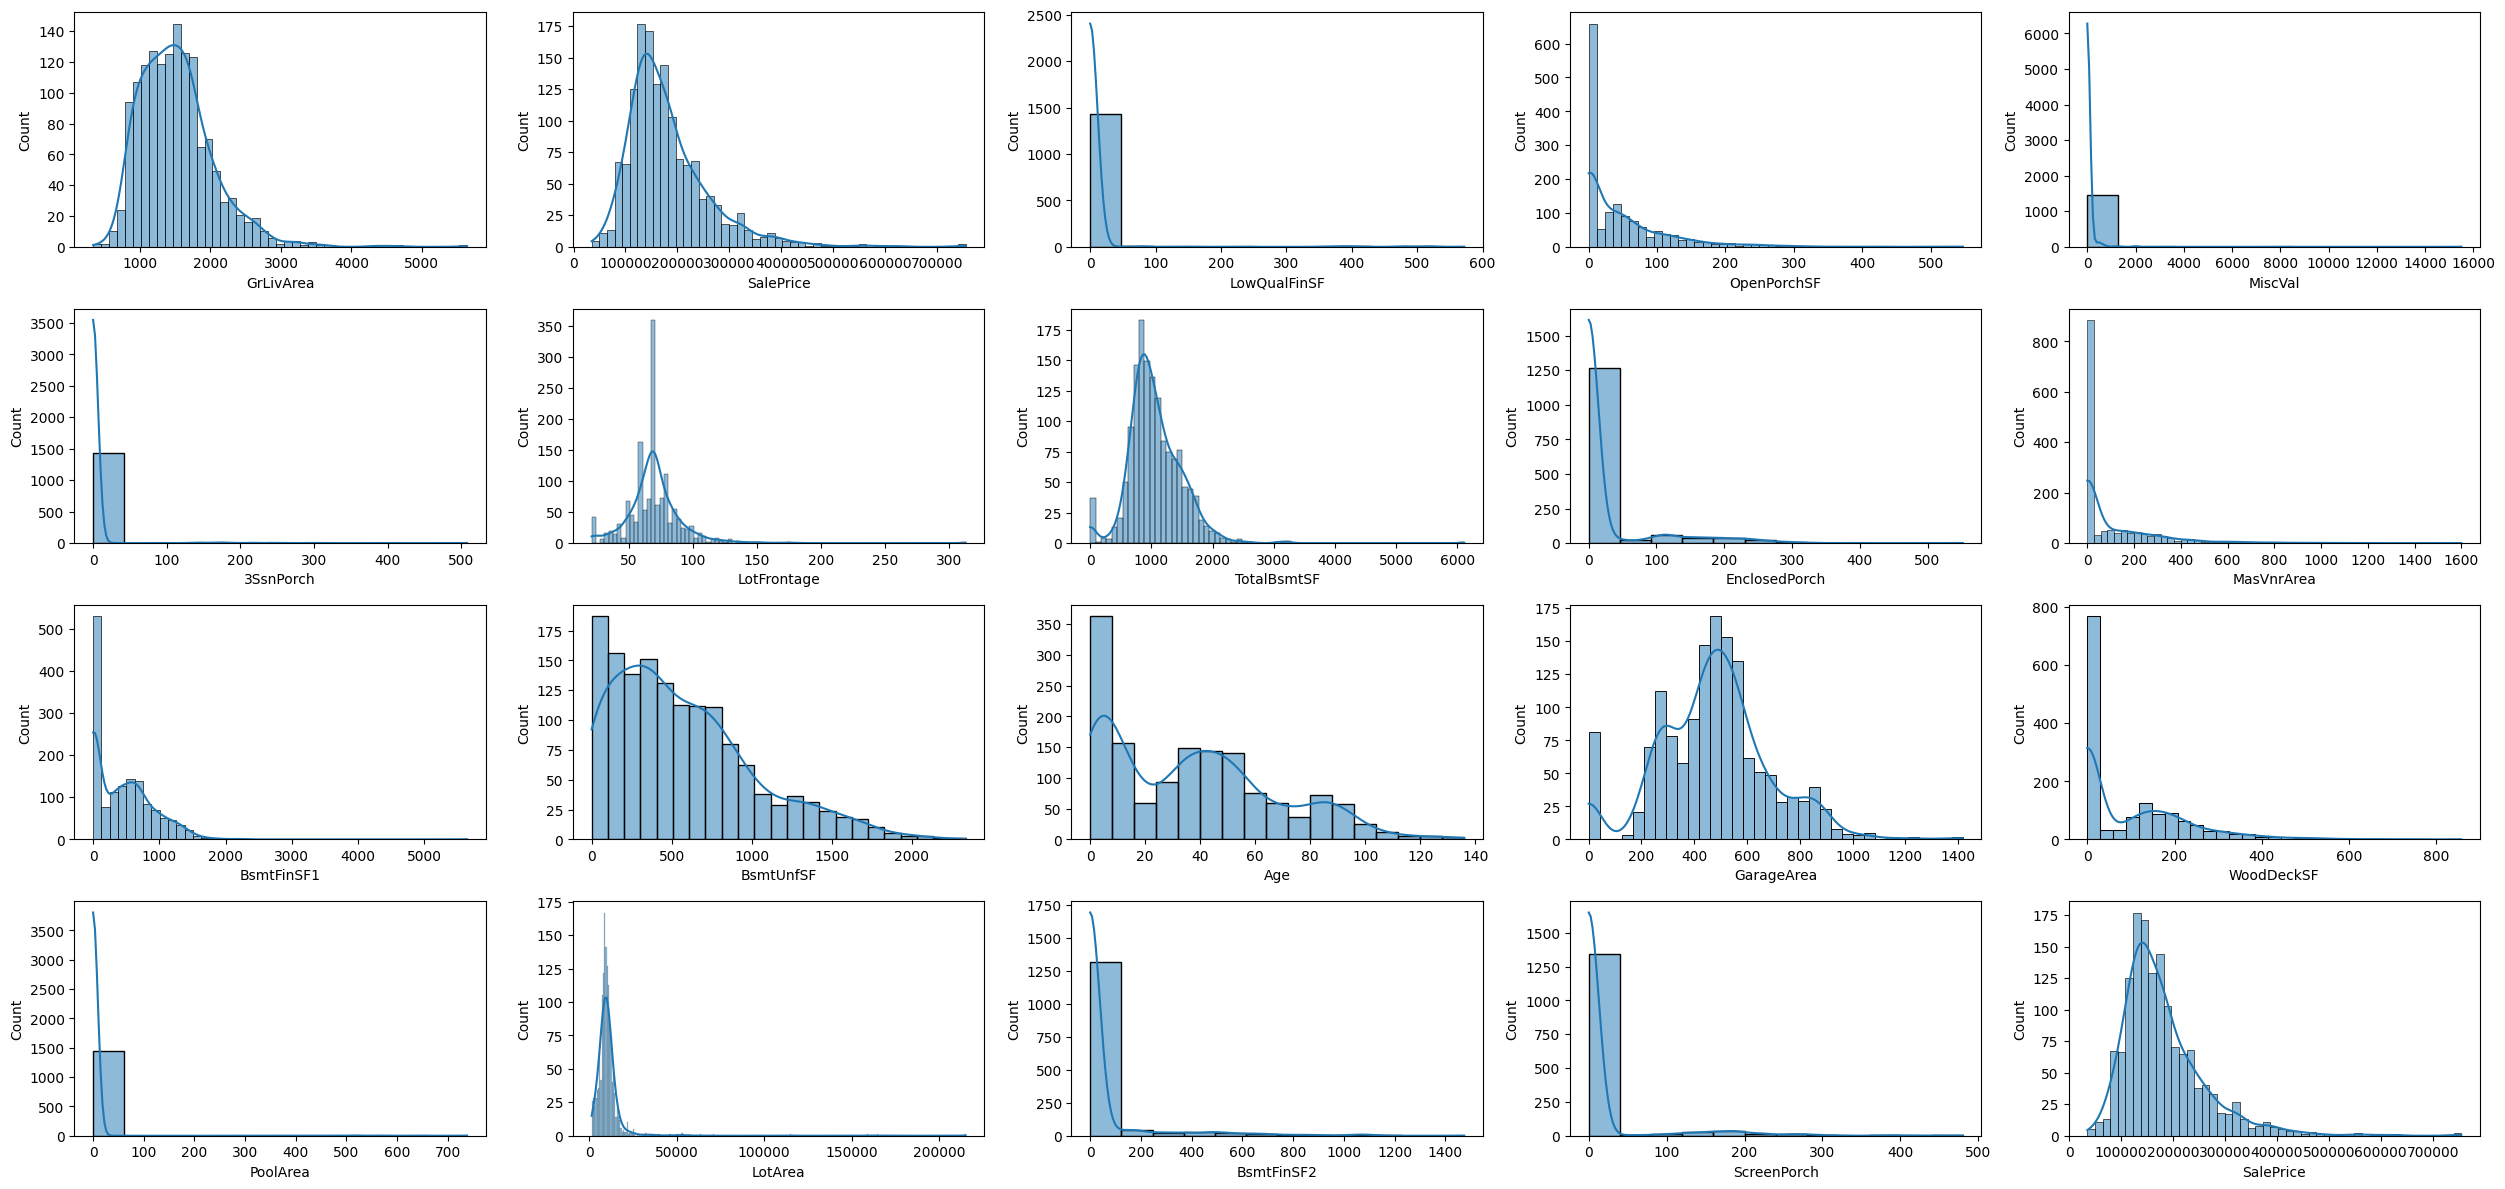

In [43]:
nr_rows = 4
nr_cols = 5


#Instantiate the subplot object
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(25,12))

#loop through the numeric columns to identify the outliers
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(continuous_feat_new):
            sns.histplot(x=continuous_feat_new[i],data = house_price, ax = axs[r][c],kde=True)
            
sns.histplot(x='SalePrice',data = house_price, ax = axs[3][4],kde=True)

#show the subplots in a tight layout
plt.tight_layout()    
plt.show()

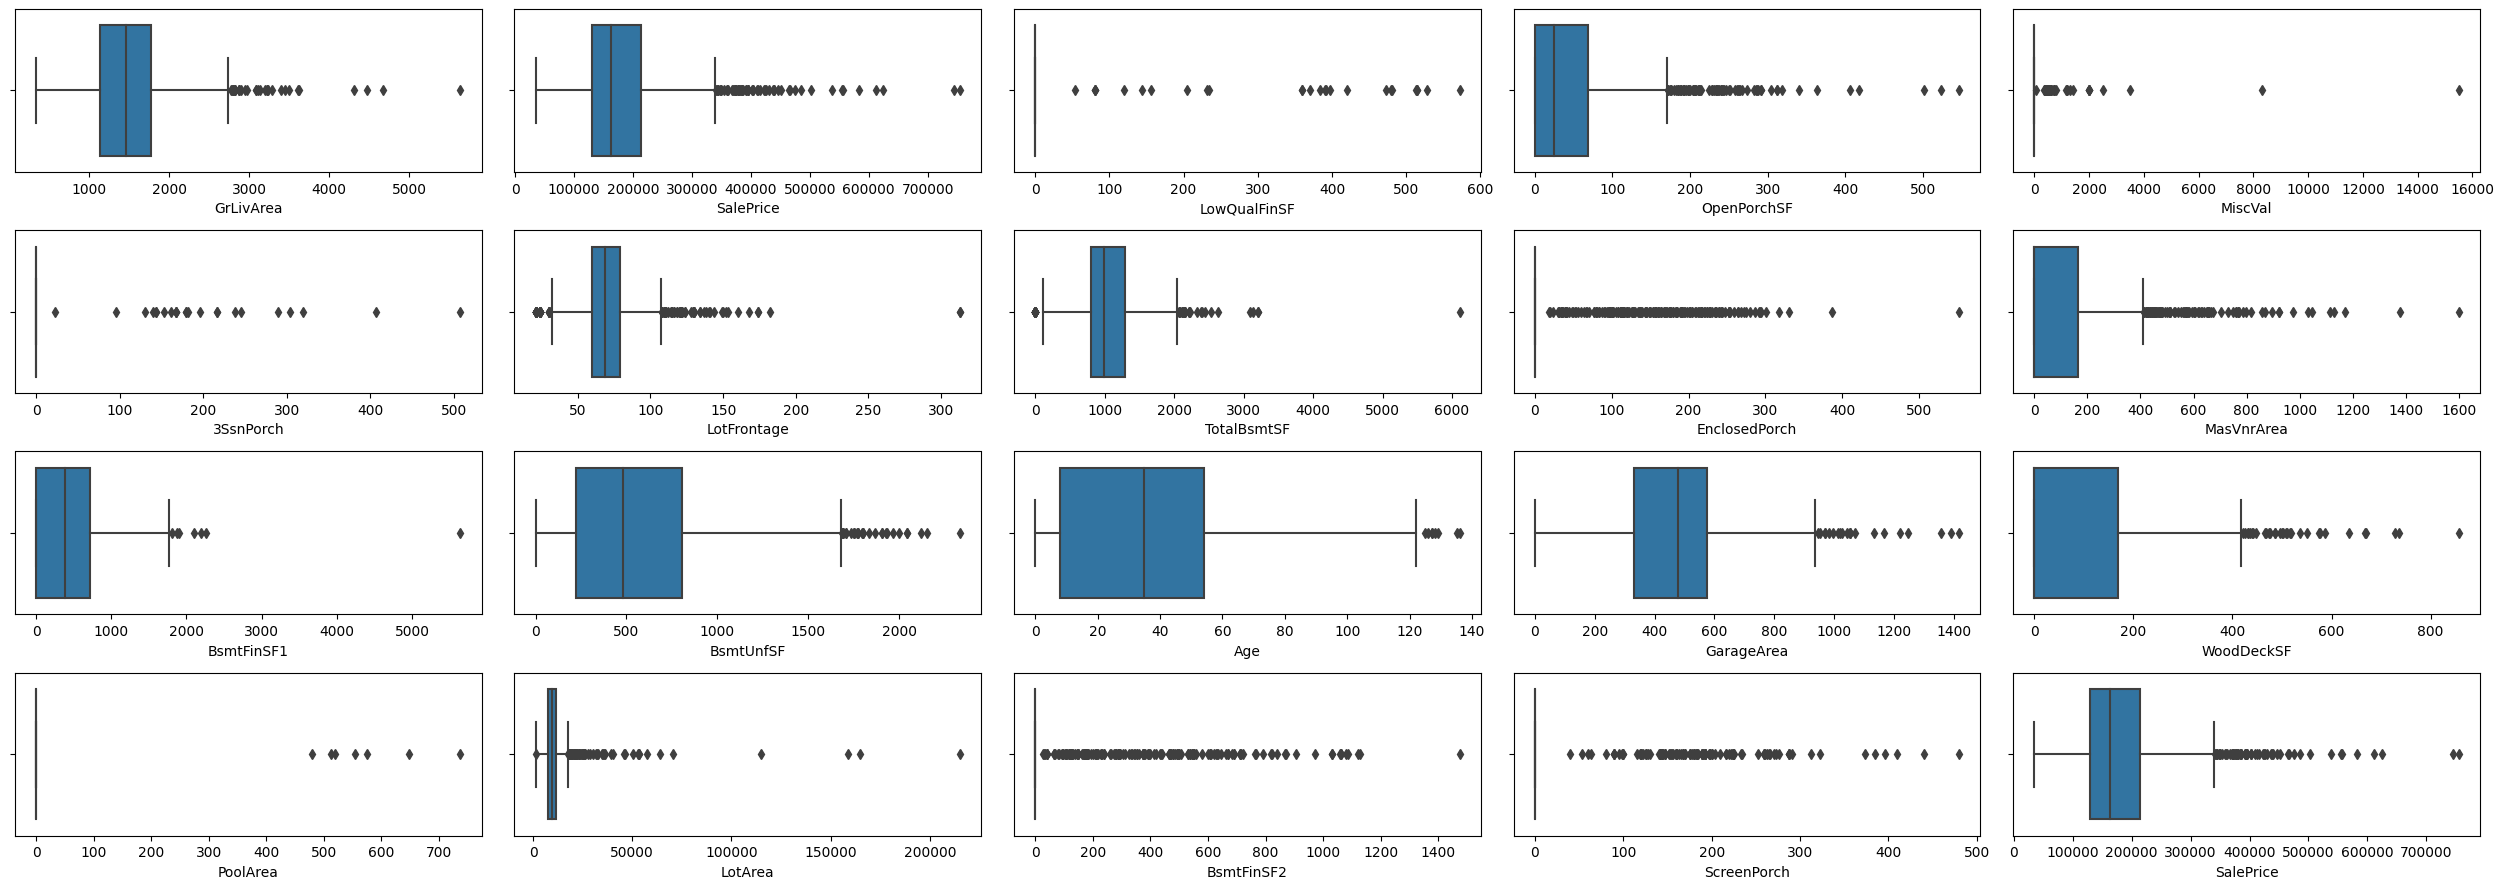

In [44]:
# Lets perform univariate analysis/ plot the distribution graphs to observe the outliers
nr_rows = 4
nr_cols = 5

#Instantiate the subplot object
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(25,9))

#loop through the numeric columns to identify the outliers
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(continuous_feat_new):
            sns.boxplot(x=continuous_feat_new[i], data=house_price, ax = axs[r][c])


sns.boxplot(x='SalePrice',data = house_price, ax = axs[3][4])
          
#show the subplots in a tight layout
plt.tight_layout()    
plt.show()

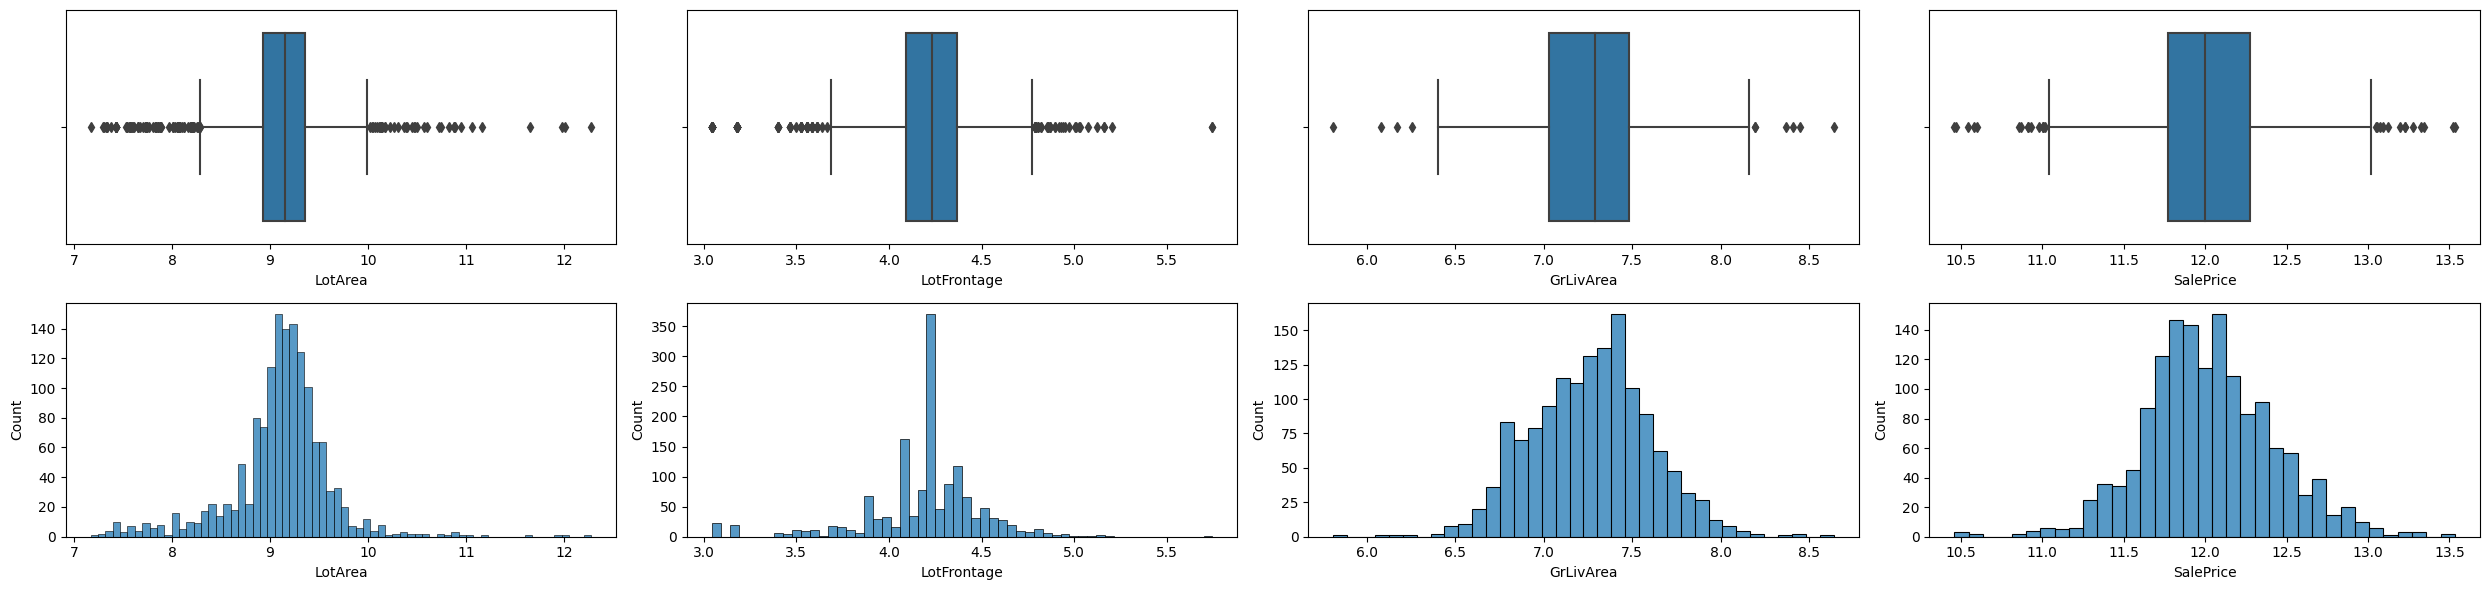

In [45]:
# As it can observed from the above boxplots and histograms, almost all the features have outliers, some are minimal like in case of BsmtFinSF1 & Age. 
# But features like LotArea, LotFrontage, GrLivArea, MasVnrArea, SalePrice have highly skewed values and this can be fixed by applying a log-normal distribution on those features.

# Only apply the log-normal transformation for variables having no 0 values

log_transform_feat=['LotArea','LotFrontage','GrLivArea','SalePrice']


fig, axs = plt.subplots(2, 4, figsize=(25,6))

for c in range(0,4):  
    sns.boxplot(x=np.log(house_price[log_transform_feat[c]]), ax = axs[0][c])

for r in range(0,4):
    sns.histplot(x=np.log(house_price[log_transform_feat[r]]), ax = axs[1][r])

#show the subplots in a tight layout
plt.tight_layout()    
plt.show()


In [46]:
# Let's transform the train data

for feature in log_transform_feat:
    house_price[feature] = np.log(house_price[feature])

house_price.head()

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0          60       RL     4.174387  9.041922   Pave  none      Reg   
1          20       RL     4.382027  9.169518   Pave  none      Reg   
2          60       RL     4.219508  9.328123   Pave  none      IR1   
3          70       RL     4.094345  9.164296   Pave  none      IR1   
4          60       RL     4.430817  9.565214   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       none         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       none         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  LowQualFinSF  GrLivArea  BsmtHalfBath  FullBath  \
0          Y      SBrkr             0   7.444249             0         2   
1          Y      SBrkr             0   7.140453             1         2   
2          Y      SBrkr             0   7.487734             0         2   
3          Y      SBrkr             0   7.448334             0         1   
4          Y      SBrkr             0   7.695303             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces  \
0         1             3             1          Gd        Typ           0   
1         0             3             1          TA        Typ           1   
2         1             3             1          Gd        Typ           1   
3         0             3             1          Gd        Typ           1   
4         1             4             1          Gd        Typ           1   

  FireplaceQu GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0        none     Attchd          RFn           2         548         TA   
1          TA     Attchd          RFn           2         460         TA   
2          TA     Attchd          RFn           2         608         TA   
3          Gd     Detchd          Unf           3         642         TA   
4          TA     Attchd          RFn           3        

Categorical & Discrete-numerical features vs SalePrice

Analysis and outliers have been handled for continuous numerical features. Let's revisit the other type of variables like Categorical & Discrete-numerical


In [47]:
categoric_features_new = list(house_price.dtypes[(house_price.dtypes== object)].index)

In [48]:
print('Number of discrete features = {}, and features are = {}'.format(len(discrete_feat_new),discrete_feat_new))
print('Number of categorical features = {}, and features are = {}'.format(len(categoric_features_new),categoric_features_new))

Number of discrete features = 11, and features are = ['FullBath', 'GarageCars', 'MSSubClass', 'OverallQual', 'BsmtHalfBath', 'BedroomAbvGr', 'OverallCond', 'HalfBath', 'KitchenAbvGr', 'MoSold', 'Fireplaces']
Number of categorical features = 43, and features are = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


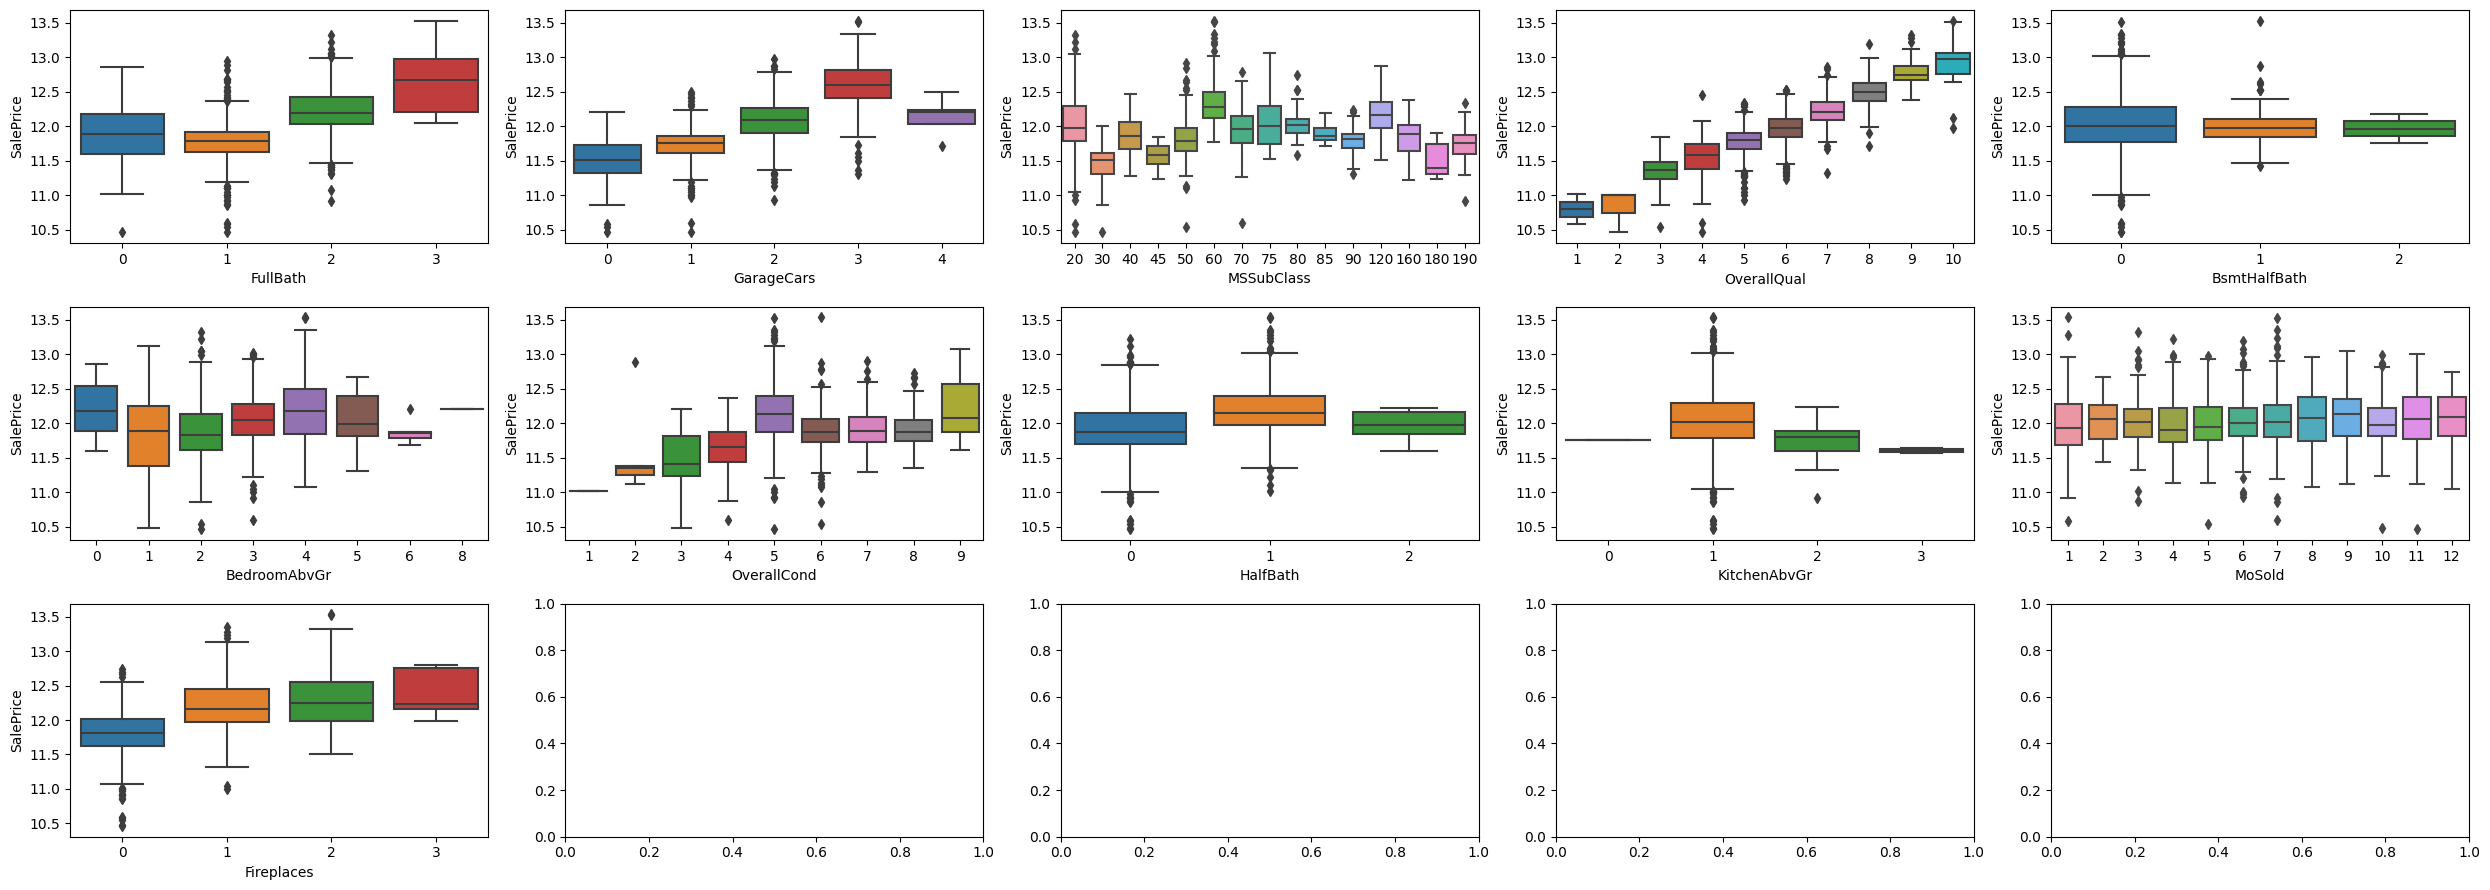

In [49]:
# Discrete features
nr_rows = 3
nr_cols = 5

#Instantiate the subplot object
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(25,9))

#loop through the numeric columns to identify the outliers
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(discrete_feat_new):
            #sns.boxplot(x='loan_status',y='open_acc',data = loan)
            sns.boxplot(y='SalePrice', x=discrete_feat_new[i], data=house_price, ax = axs[r][c])

#show the subplots in a tight layout
plt.tight_layout()    
plt.show()

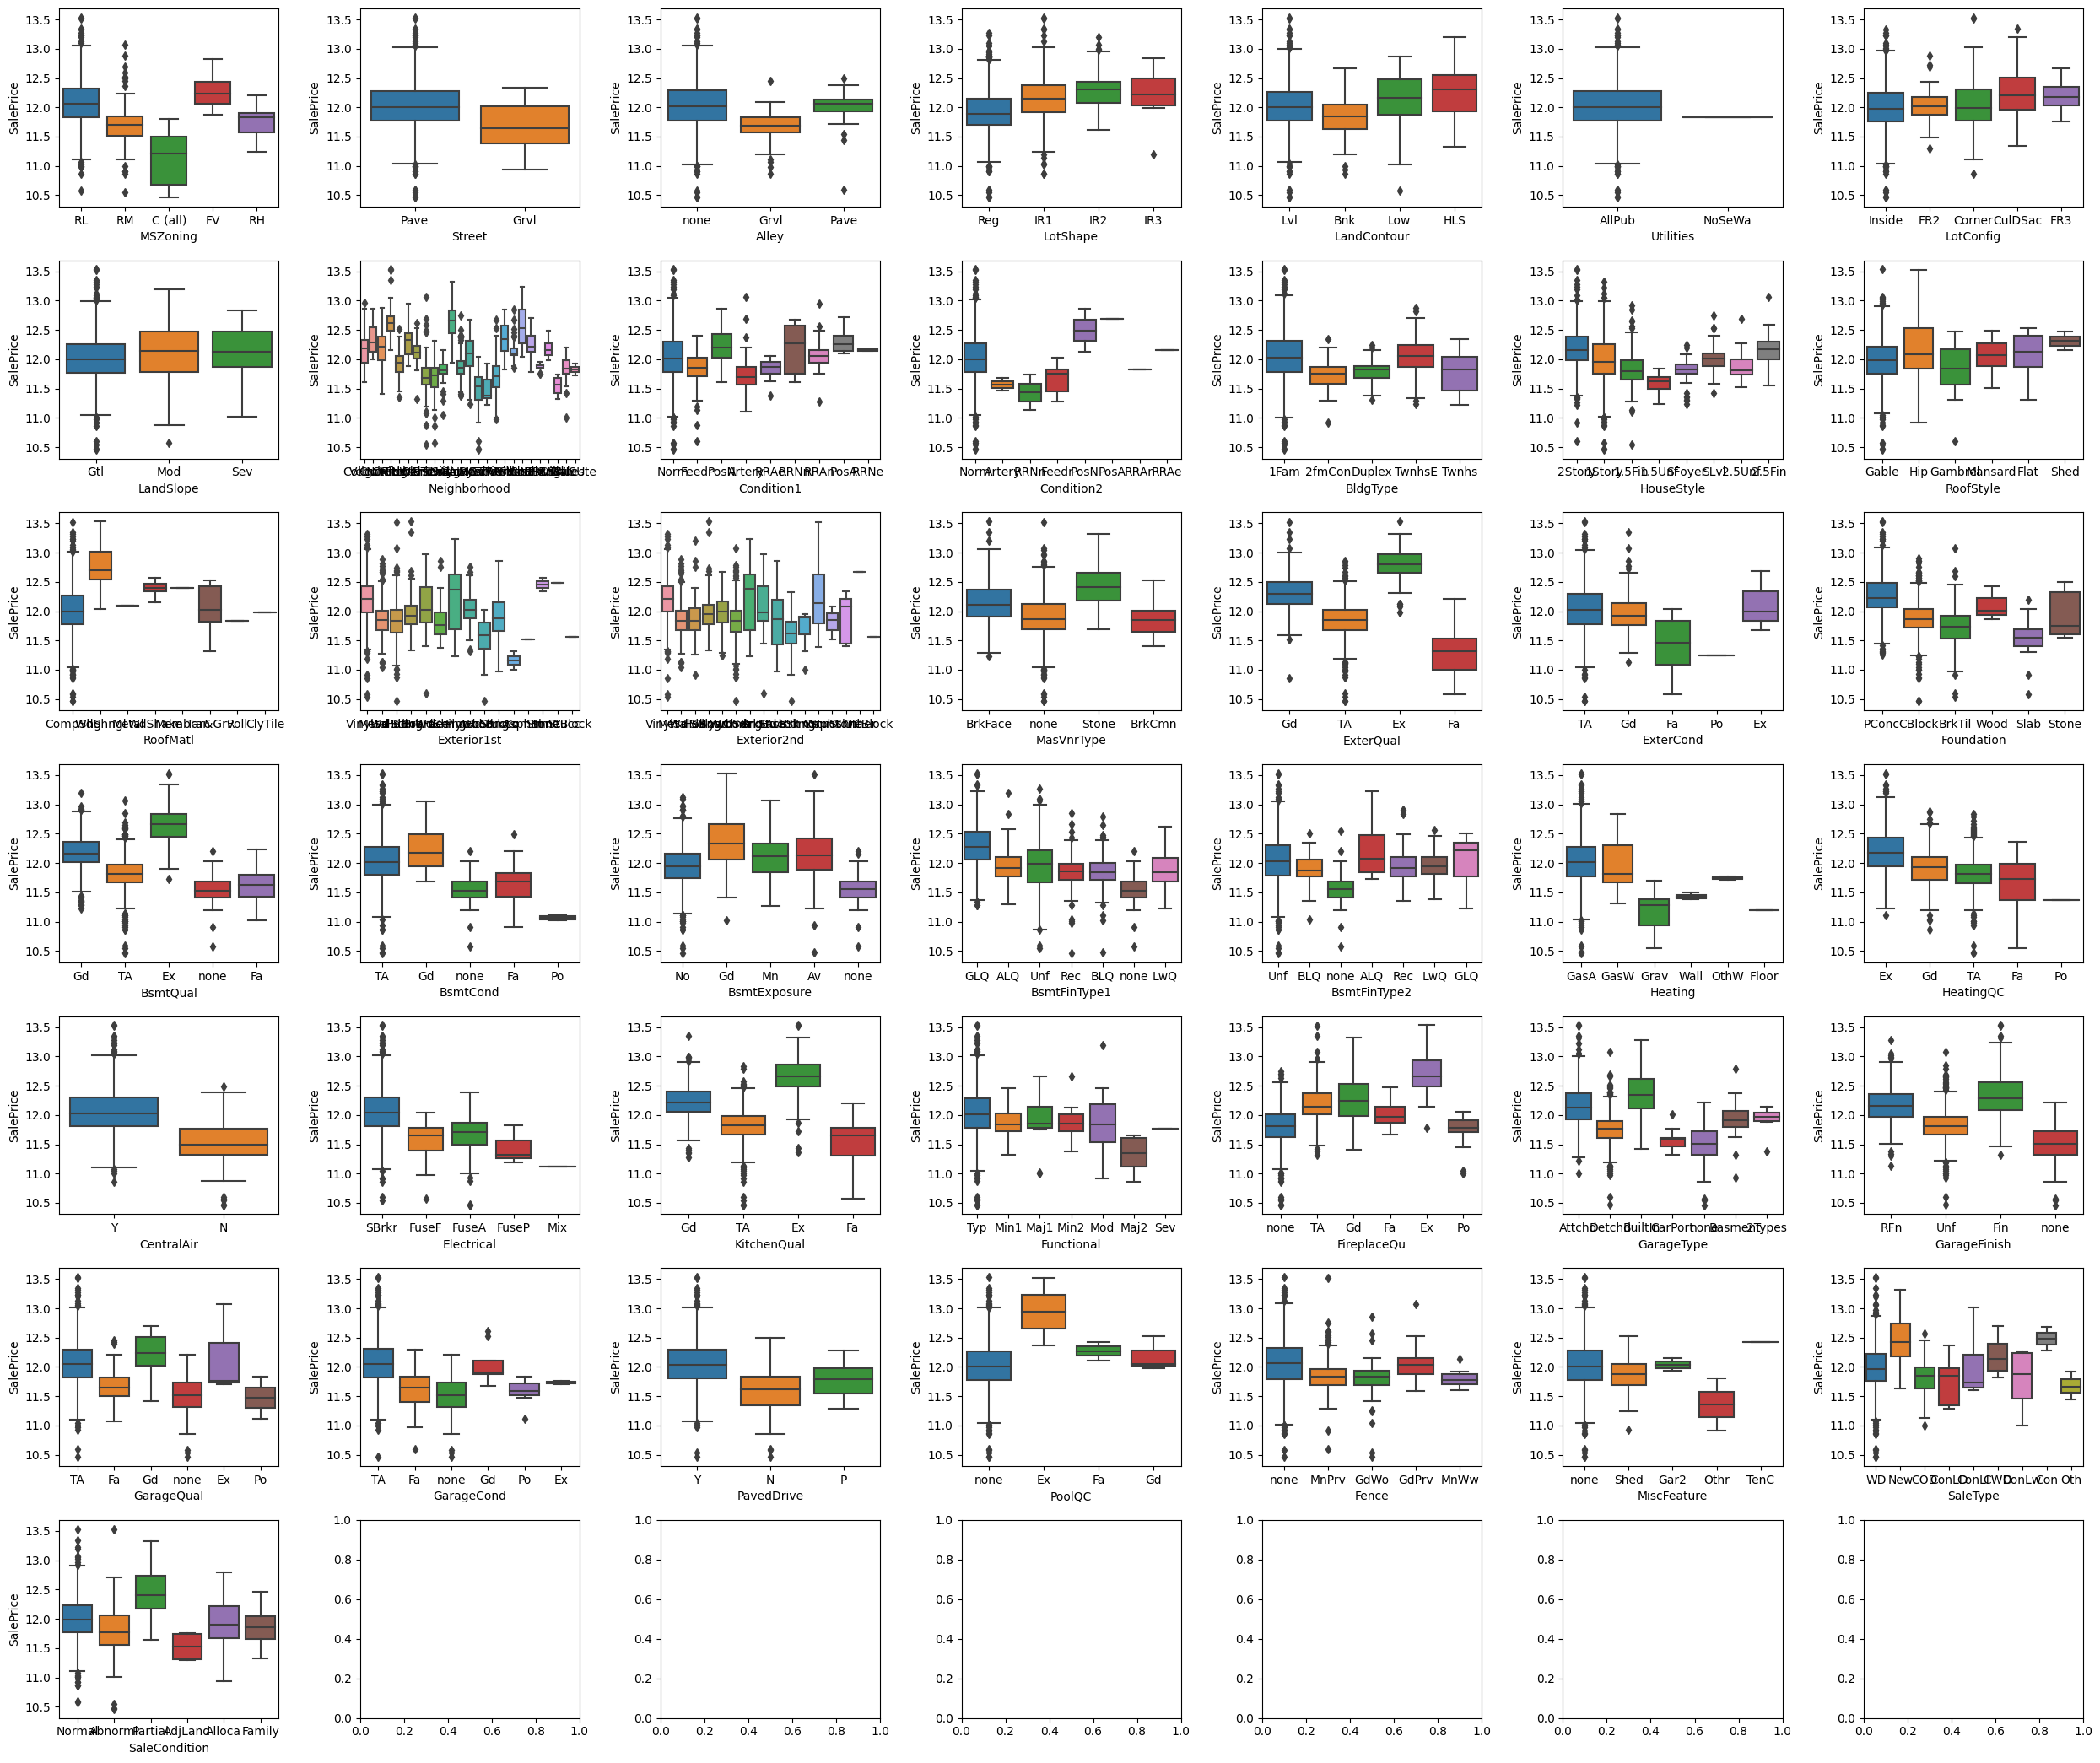

In [50]:
# categorical features

nr_rows = 7
nr_cols = 7

#Instantiate the subplot object
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(25,21))

#loop through the numeric columns to identify the outliers
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(categoric_features_new):
            #sns.boxplot(x='loan_status',y='open_acc',data = loan)
            sns.boxplot(y='SalePrice', x=categoric_features_new[i], data=house_price, ax = axs[r][c])

#show the subplots in a tight layout
plt.tight_layout()    
plt.show()


Inferences: (Categorical Features)

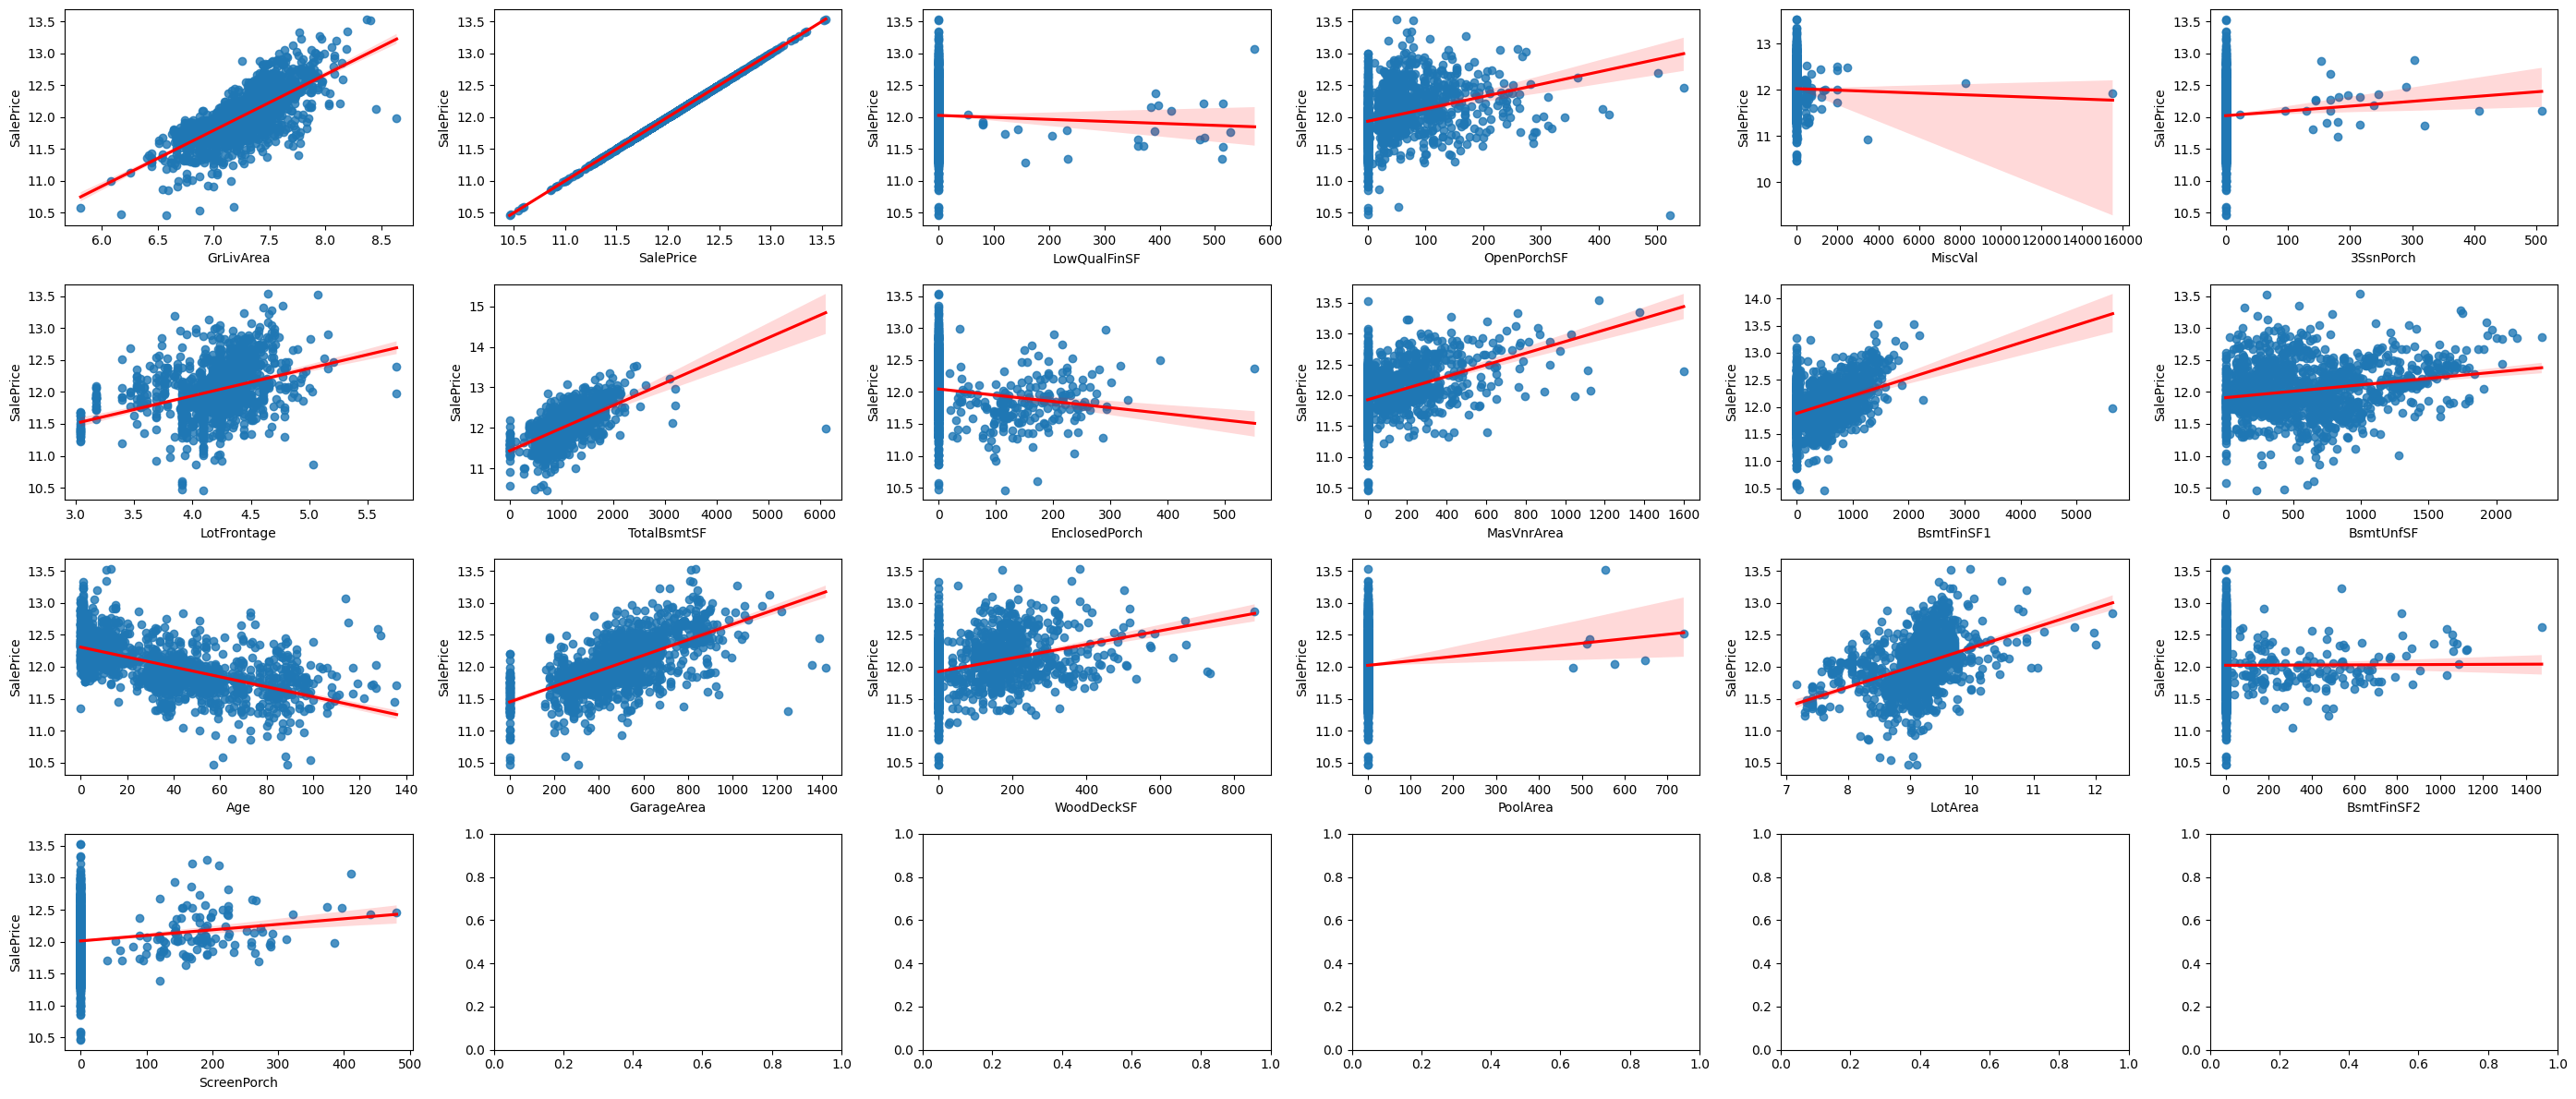

In [51]:
#Lets plot the graphs seperately for TotalBsmtSF, GrLivAread,GarageArea, 1stFlrSF, MasVnrArea, 2ndFlrSF 
# cont_vars = ['GrLivArea','GarageArea','1stFlrSF','TotalBsmtSF','MasVnrArea','2ndFlrSF']
nr_rows = 4
nr_cols = 6

#Instantiate the subplot object
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_rows*7,12))

#loop through the numeric columns to identify the outliers
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(continuous_feat_new):
            #sns.boxplot(x='loan_status',y='open_acc',data = loan)
            sns.regplot(y='SalePrice', x=continuous_feat_new[i], data=house_price, ax = axs[r][c], scatter=True, line_kws=dict(color='r') )

#show the subplots in a tight layout
plt.tight_layout()    
plt.show()

### Data Preparation

- As observed previously, some features need to be transformed using log-normal distribution to fix the data problem.
- Need to encode the discrete and categorical features
- Perform MinMax Scaling


In [52]:
print(log_transform_feat )

['LotArea', 'LotFrontage', 'GrLivArea', 'SalePrice']


In [53]:
for feat in log_transform_feat:
    house_price[feat] = np.log(house_price[feat])

house_price.head()

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0          60       RL     1.428968  2.201872   Pave  none      Reg   
1          20       RL     1.477511  2.215885   Pave  none      Reg   
2          60       RL     1.439718  2.233034   Pave  none      IR1   
3          70       RL     1.409607  2.215315   Pave  none      IR1   
4          60       RL     1.488584  2.258133   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       none         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       none         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  LowQualFinSF  GrLivArea  BsmtHalfBath  FullBath  \
0          Y      SBrkr             0   2.007442             0         2   
1          Y      SBrkr             0   1.965776             1         2   
2          Y      SBrkr             0   2.013266             0         2   
3          Y      SBrkr             0   2.007990             0         1   
4          Y      SBrkr             0   2.040610             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces  \
0         1             3             1          Gd        Typ           0   
1         0             3             1          TA        Typ           1   
2         1             3             1          Gd        Typ           1   
3         0             3             1          Gd        Typ           1   
4         1             4             1          Gd        Typ           1   

  FireplaceQu GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0        none     Attchd          RFn           2         548         TA   
1          TA     Attchd          RFn           2         460         TA   
2          TA     Attchd          RFn           2         608         TA   
3          Gd     Detchd          Unf           3         642         TA   
4          TA     Attchd          RFn           3        

In [54]:
df_checkpoint = house_price.copy()

In [58]:
print(house_price.shape,'-> Shape before generating dummies')
dummy_labels = pd.get_dummies(house_price[categoric_features_new],drop_first=True,dtype=int)
dummy_labels

(1459, 73) -> Shape before generating dummies


MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0               0            0            1            0            1   
1               0            0            1            0            1   
2               0            0            1            0            1   
3               0            0            1            0            1   
4               0            0            1            0            1   
...           ...          ...          ...          ...          ...   
1454            0            0            1            0            1   
1455            0            0            1            0            1   
1456            0            0            1            0            1   
1457            0            0            1            0            1   
1458            0            0            1            0            1   

      Alley_Pave  Alley_none  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0              0           1             0             0             1   
1              0           1             0             0             1   
2              0           1             0             0             0   
3              0           1             0             0             0   
4              0           1             0             0             0   
...          ...         ...           ...           ...           ...   
1454           0           1             0             0             1   
1455           0           1             0             0             1   
1456           0           1             0             0             1   
1457           0           1             0             0             1   
1458           0           1             0             0             1   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                   0                0                1                 0   
1                   0                0                1                 0   
2                   0                0                1                 0   
3                   0                0                1                 0   
4                   0                0                1                 0   
...               ...              ...              ...               ...   
1454                0                0                1                 0   
1455                0                0                1                 0   
1456                0                0                1                 0   
1457                0                0                1                 0   
1458                0                0                1                 0   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                     0              0              0                 1   
1                     0              1              0                 0   
2                     0              0              0                 1   
3                     0              0              0                 0   
4                     0              1              0                 0   
...                 ...            ...            ...               ...   
1454                  0              0              0                 1   
1455                  0              0              0                 1   
1456                  0              0              0                 1   
1457                  0              0              0                 1   
1458                  0              0              0                 1   

      LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0                 0              0                     0                    0   
1                 0              0                     0                    0   
2                 0              0                     0                    0   
3                 0              0                     0                    0   
4        

In [60]:
house_price.drop(categoric_features_new,inplace=True,axis=1)
house_price = pd.concat([house_price,dummy_labels],axis=1)
house_price

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0             60     1.428968  2.201872            7            5       196.0   
1             20     1.477511  2.215885            6            8         0.0   
2             60     1.439718  2.233034            7            5       162.0   
3             70     1.409607  2.215315            7            5         0.0   
4             60     1.488584  2.258133            8            5       350.0   
...          ...          ...       ...          ...          ...         ...   
1454          60     1.417583  2.194640            6            5         0.0   
1455          20     1.491251  2.249825            6            6       119.0   
1456          70     1.432618  2.209333            7            9         0.0   
1457          20     1.439718  2.217205            5            6         0.0   
1458          20     1.462674  2.219640            5            6         0.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  LowQualFinSF  GrLivArea  \
0            706           0        150          856             0   2.007442   
1            978           0        284         1262             0   1.965776   
2            486           0        434          920             0   2.013266   
3            216           0        540          756             0   2.007990   
4            655           0        490         1145             0   2.040610   
...          ...         ...        ...          ...           ...        ...   
1454           0           0        953          953             0   2.002386   
1455         790         163        589         1542             0   2.032972   
1456         275           0        877         1152             0   2.048712   
1457          49        1029          0         1078             0   1.943459   
1458         830         290        136         1256             0   1.965109   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1454             0         2         1             3             1   
1455             0         2         0             3             1   
1456             0         2         0             4             1   
1457             0         1         0             2             1   
1458             0         1         1             3             1   

      Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0              0           2         548           0           61   
1              1           2         460         298            0   
2              1           2         608           0           42   
3              1           3         642           0           35   
4              1           3         836         192           84   
...          ...         ...         ...         ...          ...   
1454           1           2         460           0           40   
1455           2           2         500         349            0   
1456           2           1         252           0           60   
1457           0           1         240         366            0   
1458           0           1         276         736           68   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0                 0          0            0         0        0       2   
1                 0          0            0         0        0       5   
2                 0          0            0         0        0       9   
3               272          0            0         0        0       2   
4                 0 

In [61]:
# # split into train and test
from sklearn.model_selection import train_test_split

house_price_train, house_price_test = train_test_split(house_price,train_size=0.7, test_size = 0.3, random_state=61)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

house_price_train[numeric_features_new]= scaler.fit_transform(house_price_train[numeric_features_new])
house_price_train.describe()

MSSubClass  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.219306     0.504084     0.462441     0.568941     0.508605   
std       0.247851     0.128973     0.113934     0.155204     0.154014   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.466412     0.426581     0.444444     0.428571   
50%       0.176471     0.519255     0.474054     0.555556     0.428571   
75%       0.294118     0.573315     0.516592     0.666667     0.571429   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.074121     0.077956     0.031441     0.242497     0.172308   
std       0.131218     0.081903     0.110711     0.192415     0.074359   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.090753     0.129787   
50%       0.000000     0.066442     0.000000     0.199486     0.160393   
75%       0.111756     0.127569     0.000000     0.348031     0.211620   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       LowQualFinSF    GrLivArea  BsmtHalfBath     FullBath     HalfBath  \
count   1021.000000  1021.000000   1021.000000  1021.000000  1021.000000   
mean       0.010108     0.563641      0.026445     0.522037     0.196376   
std        0.085728     0.118422      0.114129     0.184588     0.254136   
min        0.000000     0.000000      0.000000     0.000000     0.000000   
25%        0.000000     0.479073      0.000000     0.333333     0.000000   
50%        0.000000     0.574426      0.000000     0.666667     0.000000   
75%        0.000000     0.641369      0.000000     0.666667     0.500000   
max        1.000000     1.000000      1.000000     1.000000     1.000000   

       BedroomAbvGr  KitchenAbvGr   Fireplaces   GarageCars   GarageArea  \
count   1021.000000   1021.000000  1021.000000  1021.000000  1021.000000   
mean       0.359452      0.023996     0.204048     0.440500     0.334060   
std        0.103936      0.111417     0.215016     0.189032     0.152545   
min        0.000000      0.000000     0.000000     0.000000     0.000000   
25%        0.250000      0.000000     0.000000     0.250000     0.229196   
50%        0.375000      0.000000     0.333333     0.500000     0.338505   
75%        0.375000      0.000000     0.333333     0.500000     0.406206   
max        1.000000      1.000000     1.000000     1.000000     1.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1021.000000  1021.000000    1021.000000  1021.000000  1021.000000   
mean      0.130163     0.094533       0.040767     0.008391     0.036378   
std       0.168456     0.131699       0.112294     0.070273     0.132571   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000     0.051793       0.000000     0.000000     0.000000   
75%       0.228261     0.139442       0.000000     0.000000     0.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

          PoolArea      MiscVal       MoSold    SalePrice          Age  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.004657     0.003574     0.476983     0.537298     0.268530   
std       0.061260     0.035253     0.249449     0.129579     0.222403   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.272727     0.454565     0.058824   
50%       0.000000     0.000000     0.454545     0.535365     0.257353   
75%       0.000000     0.000000     0.636364     0.620336     0.397059   
max       1.000000     1.00

In [63]:
house_price_test[numeric_features_new] = scaler.transform(house_price_test[numeric_features_new])
house_price_test.describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  438.000000   438.000000  438.000000   438.000000   438.000000   
mean     0.211456     0.494184    0.457910     0.561390     0.515982   
std      0.251484     0.120431    0.106378     0.150128     0.170162   
min      0.000000     0.000000    0.034201     0.000000    -0.142857   
25%      0.000000     0.466412    0.423820     0.444444     0.428571   
50%      0.176471     0.519255    0.473841     0.555556     0.428571   
75%      0.294118     0.553573    0.514103     0.666667     0.571429   
max      1.000000     0.784355    1.042752     1.000000     1.000000   

       MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF  \
count  438.000000  438.000000  438.000000  438.000000   438.000000   
mean     0.076658    0.080293    0.031977    0.243770     0.175082   
std      0.131242    0.078280    0.106671    0.181729     0.065370   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.000000    0.000000    0.000000    0.104452     0.133552   
50%      0.000000    0.071669    0.000000    0.214041     0.165630   
75%      0.128810    0.123405    0.000000    0.329516     0.215303   
max      1.161103    0.387668    0.764586    0.875856     0.524714   

       LowQualFinSF   GrLivArea  BsmtHalfBath    FullBath    HalfBath  \
count    438.000000  438.000000    438.000000  438.000000  438.000000   
mean       0.010497    0.556877      0.034247    0.520548    0.179224   
std        0.083491    0.110754      0.130886    0.181692    0.244766   
min        0.000000    0.185212      0.000000    0.000000    0.000000   
25%        0.000000    0.481772      0.000000    0.333333    0.000000   
50%        0.000000    0.563457      0.000000    0.666667    0.000000   
75%        0.000000    0.626820      0.000000    0.666667    0.500000   
max        0.923077    0.851828      1.000000    1.000000    1.000000   

       BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  GarageArea  \
count    438.000000    438.000000  438.000000  438.000000  438.000000   
mean       0.355594      0.021689    0.205479    0.444635    0.332494   
std        0.097422      0.107435    0.214857    0.181967    0.146902   
min        0.000000     -0.500000    0.000000    0.000000    0.000000   
25%        0.250000      0.000000    0.000000    0.250000    0.239245   
50%        0.375000      0.000000    0.333333    0.500000    0.332863   
75%        0.375000      0.000000    0.333333    0.500000    0.406206   
max        0.625000      0.500000    1.000000    1.000000    0.880113   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count  438.000000   438.000000     438.000000  438.000000   438.000000   
mean     0.123105     0.089469       0.037543    0.008364     0.037649   
std      0.174799     0.132806       0.107179    0.076137     0.143944   
min      0.000000     0.000000       0.000000    0.000000     0.000000   
25%      0.000000     0.000000       0.000000    0.000000     0.000000   
50%      0.000000     0.047809       0.000000    0.000000     0.000000   
75%      0.227242     0.130976       0.000000    0.000000     0.000000   
max      1.164402     1.089641       0.699275    1.248157     1.170732   

         PoolArea     MiscVal      MoSold   SalePrice         Age  \
count  438.000000  438.000000  438.000000  438.000000  438.000000   
mean     0.001606    0.009135    0.500000    0.534943    0.269793   
std      0.033603    0.094901    0.236739    0.129494    0.222659   
min      0.000000    0.000000    0.000000   -0.004360    0.000000   
25%      0.000000    0.000000    0.363636    0.462302    0.051471   
50%      0.000000    0.000000    0.454545    0.525388    0.257353   
75%      0.000000    0.000000    0.636364    0.606349    0.402574   
max      0.703252    1.867470    1.000000    0.938885    0.948529   

       MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
count   438.000000   438.000000   438.000000   4

### Data Modelling

- As a first step, a Simple Linear Regression model will be build without any regularization applied
- Later-on Ridge and Lasso regressions will be performed and at last the results will be compared

In [64]:
# Splitting the data as X_train & y_train

y_train = house_price_train.pop('SalePrice')
X_train = house_price_train
print(y_train)
X_train

744     0.563515
138     0.641688
425     0.469724
835     0.452115
1269    0.490962
          ...   
123     0.512723
34      0.700519
510     0.535188
1199    0.499944
16      0.502148
Name: SalePrice, Length: 1021, dtype: float64


MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
744     0.588235     0.312739  0.350908     0.777778     0.428571    0.000000   
138     0.235294     0.540070  0.464579     0.777778     0.428571    0.232221   
425     0.235294     0.466412  0.242324     0.666667     0.857143    0.000000   
835     0.000000     0.466412  0.476714     0.333333     0.714286    0.000000   
1269    0.176471     0.564193  0.511680     0.444444     0.428571    0.130624   
...          ...          ...       ...          ...          ...         ...   
123     0.588235     0.432594  0.434855     0.555556     0.428571    0.000000   
34      0.588235     0.466412  0.418328     0.888889     0.428571    0.178520   
510     0.000000     0.549956  0.562798     0.444444     0.714286    0.050798   
1199    0.000000     0.549956  0.509675     0.333333     0.428571    0.037010   
16      0.000000     0.519255  0.509786     0.555556     0.714286    0.130624   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  LowQualFinSF  GrLivArea  \
744     0.129872    0.000000   0.258562     0.218822           0.0   0.539998   
138     0.118356    0.000000   0.143836     0.164321           0.0   0.651685   
425     0.000000    0.000000   0.278682     0.106547           0.0   0.553335   
835     0.078313    0.000000   0.267551     0.174632           0.0   0.459675   
1269    0.081502    0.000000   0.177226     0.143044           0.0   0.585466   
...          ...         ...        ...          ...           ...        ...   
123     0.053154    0.000000   0.384846     0.196236           0.0   0.501526   
34      0.204288    0.000000   0.174658     0.255483           0.0   0.593710   
510     0.115167    0.122117   0.076199     0.164975           0.0   0.546739   
1199    0.096917    0.000000   0.215753     0.172013           0.0   0.551573   
16      0.102410    0.000000   0.182363     0.164321           0.0   0.437559   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
744            0.0  0.666667       0.0         0.250           0.0   
138            0.0  0.666667       0.5         0.375           0.0   
425            0.0  0.333333       0.5         0.375           0.0   
835            0.0  0.666667       0.0         0.250           0.0   
1269           0.0  0.333333       0.5         0.375           0.0   
...            ...       ...       ...           ...           ...   
123            0.0  0.666667       0.0         0.250           0.0   
34             0.0  0.666667       0.0         0.250           0.0   
510            0.0  0.333333       0.0         0.250           0.0   
1199           0.0  0.333333       0.5         0.375           0.0   
16             0.0  0.333333       0.0         0.250           0.0   

      Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
744     0.333333        0.50    0.325811    0.130435     0.000000   
138     0.666667        0.75    0.465444    0.304348     0.211155   
425     0.666667        0.25    0.169252    0.000000     0.000000   
835     0.000000        0.50    0.307475    0.394022     0.000000   
1269    0.000000        0.25    0.222144    0.000000     0.000000   
...          ...         ...         ...         ...          ...   
123     0.000000        0.50    0.373766    0.000000     0.125498   
34      0.333333        0.50    0.392102    0.275815     0.093625   
510     0.666667        0.25    0.203103    0.440217     0.083665   
1199    0.333333        0.50    0.323695    0.000000     0.163347   
16      0.333333        0.50    0.338505    0.000000     0.000000   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
744        0.126812   0.412776     0.000000       0.0  0.000000  0.818182   
138        0.000000   0.000000     0.000000       0.0  0.000000  1.000000   
425        0.228261   0.000000     0.000000       0.0  0.000000  0.727273   
835        0.000000   0.000000     0.000000       0.0  0.000000  0.090909   
1269 

In [67]:
y_test = house_price_test.pop('SalePrice')
X_test = house_price_test
print(y_test)
X_test

14      0.519226
1248    0.455975
674     0.481706
164     0.508666
1006    0.532421
          ...   
1220    0.416452
219     0.539758
1311    0.602060
33      0.536366
149     0.416452
Name: SalePrice, Length: 438, dtype: float64


MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
14      0.000000     0.519255  0.503756     0.555556     0.428571    0.153846   
1248    0.323529     0.466412  0.476714     0.555556     0.428571    0.000000   
674     0.000000     0.573315  0.467697     0.555556     0.571429    0.000000   
164     0.117647     0.302236  0.351117     0.555556     0.714286    0.000000   
1006    0.000000     0.519255  0.525962     0.555556     0.142857    0.000000   
...          ...          ...       ...          ...          ...         ...   
1220    0.000000     0.502640  0.432321     0.444444     0.428571    0.000000   
219     0.588235     0.332802  0.214613     0.666667     0.428571    0.011611   
1311    0.000000     0.513817  0.458574     0.666667     0.428571    0.058055   
33      0.000000     0.524596  0.496597     0.444444     0.428571    0.000000   
149     0.176471     0.519255  0.383451     0.444444     0.285714    0.000000   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  LowQualFinSF  GrLivArea  \
14      0.129872    0.000000   0.222603     0.205074           0.0   0.517154   
1248    0.056520    0.000000   0.178082     0.120295           0.0   0.686803   
674     0.158044    0.000000   0.104452     0.185925           0.0   0.482245   
164     0.065556    0.000000   0.333476     0.188052           0.0   0.605562   
1006    0.219171    0.000000   0.179795     0.271195           0.0   0.614103   
...          ...         ...        ...          ...           ...        ...   
1220    0.055280    0.407056   0.000000     0.149264           0.0   0.402234   
219     0.002835    0.000000   0.527397     0.204255           0.0   0.515740   
1311    0.163891    0.000000   0.149401     0.208511           0.0   0.523025   
33      0.180369    0.000000   0.162671     0.228805           0.0   0.622807   
149     0.000000    0.000000   0.383562     0.146645           0.0   0.541828   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
14             0.0  0.333333       0.5         0.250           0.0   
1248           0.0  0.333333       0.5         0.375           0.0   
674            0.0  0.333333       0.0         0.375           0.0   
164            0.0  0.666667       0.0         0.375           0.0   
1006           0.5  0.666667       0.0         0.375           0.0   
...            ...       ...       ...           ...           ...   
1220           0.0  0.333333       0.0         0.250           0.0   
219            0.0  0.666667       0.0         0.250           0.0   
1311           0.0  0.666667       0.0         0.375           0.0   
33             0.5  0.333333       0.5         0.500           0.0   
149            0.0  0.333333       0.0         0.375           0.0   

      Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
14      0.333333        0.25    0.248237    0.000000     0.424303   
1248    0.333333        0.50    0.279267    0.000000     0.000000   
674     0.333333        0.25    0.270804    0.578804     0.000000   
164     0.000000        0.25    0.152327    0.000000     0.000000   
1006    0.333333        0.50    0.341326    0.000000     0.000000   
...          ...         ...         ...         ...          ...   
1220    0.000000        0.25    0.203103    0.000000     0.000000   
219     0.000000        0.50    0.308886    0.146739     0.000000   
1311    0.000000        0.50    0.358251    0.358696     0.195219   
33      0.333333        0.50    0.315233    0.000000     0.075697   
149     0.000000        0.25    0.169252    0.271739     0.227092   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  \
14         0.318841        0.0     0.000000       0.0      0.0  0.363636   
1248       0.469203        0.0     0.000000       0.0      0.0  0.272727   
674        0.000000        0.0     0.000000       0.0      0.0  0.545455   
164        0.331522        0.0     0.000000       0.0      0.0  0.818182   
1006      

In [65]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [95]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

10902838513.953806
[-7.84967893e-04 -8.54102168e-03  1.31574461e-01  1.15003064e-01
  1.07203590e-01  2.51557753e-02  1.54064304e+11  4.02357874e+10
  6.37658069e+10 -1.66784709e+11 -2.72137934e-02  3.91159779e-01
 -2.13866828e-03  1.85585966e-02  9.18085721e-03  4.78743265e-03
 -3.87965354e-02  2.81264737e-02  3.01681344e-02  3.07639745e-02
  2.01011050e-02  1.30791387e-02  1.54259573e-02  2.11881581e-02
  2.64276427e-02  3.09245555e-01  2.75791108e-01 -3.19448560e-04
 -9.41972072e-02  9.06482745e-02  9.96107151e-02  8.82349204e-02
  7.86154166e-02  4.94728088e-02  2.15530396e-03  6.06536865e-04
  1.19776726e-02  1.37319565e-02  5.55765629e-03  2.06394196e-02
  5.23185730e-03  2.08129883e-02 -7.45692253e-02  4.44412231e-03
 -1.90582275e-02 -3.42900753e-02 -7.21359253e-03  4.23431396e-03
 -1.15615129e-02 -1.16633922e-02 -2.15988159e-02 -5.77163696e-03
  7.59315491e-03 -1.52206421e-02  2.46505737e-02 -4.39682007e-02
 -1.26104355e-02 -2.66513824e-02 -5.20992279e-02 -3.15990448e-02
 -2.75

In [68]:
#Unregularized Model
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9509079296256236
Testing R2
-1.519313936119294e+20


In [97]:
# As we can observe, the Unregularized Linear model is overfitting for train data and so the huge difference in the R2 value 
# Let's also see other scores like RSS(Residual Sum of Squares), MSE (MeanSquaredError)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

lm_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
r2_test_lr = r2_score(y_test, y_pred_test)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
rss2_lr = np.sum(np.square(y_test - y_pred_test))
mse_train_lr = mean_squared_error(y_train, y_pred_train)
mse_test_lr = mean_squared_error(y_test, y_pred_test)

lm_metric.append(r2_train_lr)
lm_metric.append(r2_test_lr)
lm_metric.append(rss1_lr)
lm_metric.append(rss2_lr)
lm_metric.append(mse_train_lr**0.5)
lm_metric.append(mse_test_lr**0.5)

print("R2 Score for Training data : ",r2_train_lr)
print("R2 Score for Test data : ",r2_test_lr)
print("RSS Score for Training data : ",rss1_lr)
print("RSS Score for Test data : ",rss2_lr)
print("MSE Score for Training data : ",mse_train_lr)
print("MSE Score for Test data : ",mse_test_lr)


R2 Score for Training data :  0.9509079296256236
R2 Score for Test data :  -1.519313936119294e+20
RSS Score for Training data :  0.8407729734143561
RSS Score for Test data :  1.1133330093823849e+21
MSE Score for Training data :  0.0008234798956066171
MSE Score for Test data :  2.5418561858045317e+18


We will first form a list of params for the model to choose from

In [99]:
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#### Ridge Regression

In [100]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [101]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.030601      0.003939         0.007510        0.004714         0.0   
1       0.036276      0.007123         0.010141        0.003600         0.0   
2       0.032927      0.007318         0.010145        0.003404    0.000001   
3       0.022904      0.006668         0.005942        0.001891     0.00001   
4       0.029601      0.005557         0.006498        0.003116      0.0001   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-08}           0.612856           0.663911           0.929583   
1   {'alpha': 1e-07}           0.612857           0.663907           0.929583   
2   {'alpha': 1e-06}           0.612868           0.663868           0.929583   
3   {'alpha': 1e-05}           0.612981           0.663473           0.929586   
4  {'alpha': 0.0001}           0.614105           0.659702           0.929609   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.699422           0.908778           0.893571           0.355739   
1           0.699424           0.908778           0.893572           0.355739   
2           0.699436           0.908778           0.893573           0.355737   
3           0.699564           0.908777           0.893587           0.355712   
4           0.700833           0.908766           0.893727           0.355468   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0           0.926096           0.804404           0.781749         0.757611   
1           0.926096           0.804404           0.781749         0.757611   
2           0.926096           0.804404           0.781752         0.757610   
3           0.926100           0.804405           0.781778         0.757596   
4           0.926137           0.804421           0.782044         0.757481   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.172247               26             0.95577            0.952844   
1        0.172247               27             0.95577            0.952844   
2        0.172249               28             0.95577            0.952844   
3        0.172264               29             0.95577            0.952844   
4        0.172415               30             0.95577            0.952843   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.950209            0.950506            0.950913   
1            0.950209            0.950506            0.950913   
2            0.950209            0.950506            0.950913   
3            0.950209            0.950506            0.950913   
4            0.950209            0.950506            0.950913   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.951202            0.961576            0.949734   
1            0.951202            0.961576            0.949734   
2            0.951202            0.961576            0.949734   
3            0.951202            0.961576            0.949734   
4            0.951202            0.961576            0.949734   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.955394            0.953519          0.953167         0.003453  
1            0.955394            0.953519          0.953167         0.003453  
2            0.955394            0.953519          0.953167         0.003453  
3            0.955394            0.953519          0.953167         0.003453  
4            0.955394            0.953519          0.953167         0.003453

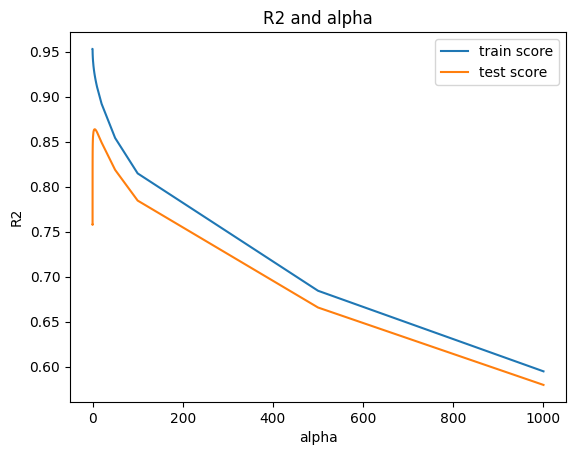

In [102]:
# plotting mean test and train scores with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [85]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [104]:
# Lets rerun the model with params from 3 to 7 with a linear spacing and having 1000 values in between
params_refined = {'alpha': np.linspace(4, 6 , num = 100) }

In [105]:
folds = 10
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params_refined,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([4.        , 4.02020202, 4.04040404, 4.06060606, 4.08080808,
       4.1010101 , 4.12121212, 4.14141414, 4.16161616, 4.18181818,
       4.2020202 , 4.22222222, 4.24242424, 4.26262626, 4.28282828,
       4.3030303 , 4.32323232, 4.34343434, 4.36363636, 4.38383838,
       4.4040404 , 4.42424242, 4.44444444, 4.46464646, 4.48484848,
       4.50505051, 4.52525253, 4...
       5.41414141, 5.43434343, 5.45454545, 5.47474747, 5.49494949,
       5.51515152, 5.53535354, 5.55555556, 5.57575758, 5.5959596 ,
       5.61616162, 5.63636364, 5.65656566, 5.67676768, 5.6969697 ,
       5.71717172, 5.73737374, 5.75757576, 5.77777778, 5.7979798 ,
       5.81818182, 5.83838384, 5.85858586, 5.87878788, 5.8989899 ,
       5.91919192, 5.93939394, 5.95959596, 5.97979798, 6.        ])},
             return_train_score=True, scoring='r2', verbose=1)

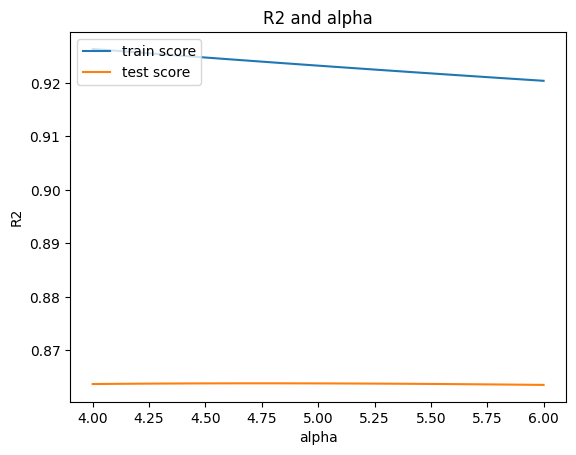

In [106]:
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [107]:
best_alpha_ridge = model_cv.best_params_['alpha']
ridge = Ridge(alpha=best_alpha_ridge)

ridge.fit(X_train, y_train)


Ridge(alpha=4.7272727272727275)

In [113]:
print(ridge.coef_)

[-9.70938044e-03  1.58911147e-02  6.45006064e-02  1.08400446e-01
  6.91271974e-02  1.27662929e-02  2.09428170e-02  1.83139485e-02
  1.52651411e-02  2.95999000e-02  1.07842894e-02  1.47498041e-01
 -2.93757267e-03  6.25163766e-02  2.45486085e-02  4.55576344e-02
 -7.22955049e-03  2.58483484e-02  5.31417323e-02  2.71685278e-02
  2.84115697e-02  2.33573694e-02  8.13512354e-03  1.31000374e-02
  2.84367535e-02  1.40479667e-02  2.27931904e-03  3.03675844e-03
 -2.02872755e-02  1.07761734e-02  2.31171929e-02  1.73525085e-02
  3.14129472e-03  1.45133021e-02  7.61830306e-03 -6.40731490e-04
  1.75869425e-02 -1.90797413e-02  5.89448435e-03  1.97686894e-02
  5.82433391e-03  1.79147289e-02 -1.13505074e-02  1.63585459e-02
 -1.87465591e-02 -1.07297969e-02 -6.58640140e-03 -4.49725655e-04
 -5.07934201e-03 -7.27433487e-03  1.96931240e-04 -2.67107875e-03
  2.04082369e-02 -5.90982192e-03  3.70023800e-02 -3.12333796e-02
 -8.91972652e-03 -2.42091650e-02 -3.55440749e-02 -8.70260032e-03
 -1.21822065e-02 -3.25101

In [210]:
# Let's also see other scores like RSS(Residual Sum of Squares), RMSE (RootMeanSquaredError)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_metric = []
r2_train_ridge = r2_score(y_train, y_pred_train)
r2_test_ridge = r2_score(y_test, y_pred_test)
rss_train_ridge = np.sum(np.square(y_train - y_pred_train))
rss_test_ridge = np.sum(np.square(y_test - y_pred_test))
mse_train_ridge = mean_squared_error(y_train, y_pred_train)
mse_test_ridge = mean_squared_error(y_test, y_pred_test)

ridge_metric.append(r2_train_ridge)
ridge_metric.append(r2_test_ridge)
ridge_metric.append(rss_train_ridge)
ridge_metric.append(rss_test_ridge)
ridge_metric.append(mse_train_ridge**0.5)
ridge_metric.append(mse_test_ridge**0.5)

print('Best Hyperparameter value alpha for Ridge =',best_alpha_ridge)
print("R2 Score for Training data  : ",r2_train_ridge)
print("R2 Score for Test data      : ",r2_test_ridge)
print("RSS Score for Training data : ",rss_train_ridge)
print("RSS Score for Test data     : ",rss_test_ridge)
print("RMSE Score for Training data : ",mse_train_ridge**0.5)
print("RMSE Score for Test data     : ",mse_test_ridge**0.5)


Best Hyperparameter value alpha for Ridge = 4.7272727272727275
R2 Score for Training data  :  0.9228635238777343
R2 Score for Test data      :  0.8716529192567106
RSS Score for Training data :  1.3210741346503383
RSS Score for Test data     :  0.9405103070031383
RMSE Score for Training data :  0.03597085193163894
RMSE Score for Test data     :  0.046338793747175144


#### Lasso Regression

In [142]:
# Applying Ridge
lasso = Lasso()

# cross validation
folds = 20
model_cv_lasso = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv_lasso.fit(X_train, y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits


c:\CustInstallation\epgpEnv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.901e-01, tolerance: 1.633e-03
  model = cd_fast.enet_coordinate_descent(
c:\CustInstallation\epgpEnv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.621e-01, tolerance: 1.630e-03
  model = cd_fast.enet_coordinate_descent(
c:\CustInstallation\epgpEnv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.777e-01,

GridSearchCV(cv=20, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [143]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.176501      0.039671         0.007113        0.005603         0.0   
1       0.184532      0.054091         0.007360        0.005211         0.0   
2       0.187192      0.070053         0.008081        0.005328    0.000001   
3       0.209421      0.057229         0.007182        0.003617     0.00001   
4       0.028042      0.005122         0.007587        0.003863      0.0001   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-08}           0.340615           0.824924           0.854366   
1   {'alpha': 1e-07}           0.344070           0.825140           0.856282   
2   {'alpha': 1e-06}           0.379571           0.827219           0.866775   
3   {'alpha': 1e-05}           0.598302           0.842857           0.857312   
4  {'alpha': 0.0001}           0.907134           0.854329           0.822170   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.401719           0.921650           0.950129           0.938280   
1           0.404758           0.921794           0.950079           0.938359   
2           0.433791           0.922842           0.949123           0.939042   
3           0.614100           0.922113           0.939606           0.939771   
4           0.918027           0.904170           0.912881           0.933300   

   split7_test_score  split8_test_score  split9_test_score  \
0           0.452496           0.870178           0.944681   
1           0.454183           0.869959           0.944720   
2           0.471187           0.867694           0.944862   
3           0.661969           0.848784           0.944196   
4           0.937958           0.848910           0.941689   

   split10_test_score  split11_test_score  split12_test_score  \
0            0.913397            0.924873            0.110793   
1            0.913444            0.925525            0.113047   
2            0.914277            0.923669            0.077342   
3            0.920483            0.924773            0.099805   
4            0.923789            0.941586            0.321262   

   split13_test_score  split14_test_score  split15_test_score  \
0            0.855551            0.939986            0.926511   
1            0.855569            0.940058            0.926583   
2            0.855631            0.940410            0.927276   
3            0.860941            0.942509            0.928730   
4            0.892760            0.941787            0.935595   

   split16_test_score  split17_test_score  split18_test_score  \
0            0.646230            0.927034            0.755315   
1            0.645718            0.927086            0.758414   
2            0.640109            0.927973            0.779434   
3            0.535406            0.933085            0.855442   
4            0.701332            0.938326            0.879888   

   split19_test_score  mean_test_score  std_test_score  rank_test_score  \
0            0.876532         0.768763        0.239435                6   
1            0.876633         0.769571        0.238549                5   
2            0.877528         0.773288        0.237710                4   
3            0.876558         0.802337        0.204209                3   
4            0.877164         0.866703        0.137038                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.951584            0.954919            0.952592   
1            0.951583            0.954918            0.952590   
2            0.951542            0.954879            0.952540   
3            0.949751            0.952711            0.950566   
4            0.930757            0.932628            0.932867   

   split3_train_score  split4_train_score  split5_train_score  \
0            0.951211            0.950876            0.950142   
1            0.951210            0.9

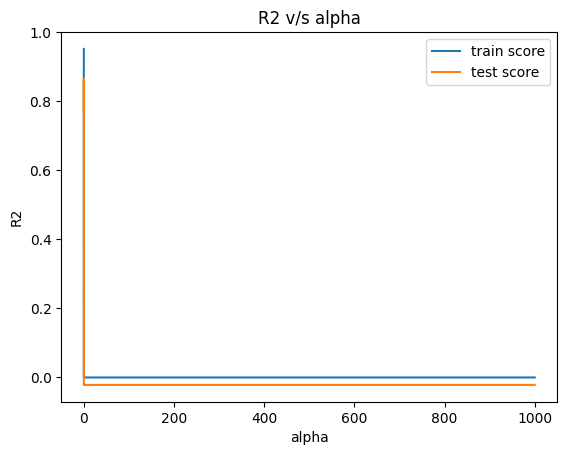

In [144]:
# plotting mean test and train scores v/s alpha
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 v/s alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [149]:
print(model_cv_lasso.best_params_)

{'alpha': 0.0001}


In [150]:
# Now let's fine tune the parameters more
fine_params = {'alpha': np.linspace(0.00008,0.0004, num = 100) }

In [154]:
folds = 10
model_cv_lasso = GridSearchCV(estimator = lasso,
                        param_grid = fine_params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv_lasso.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([8.00000000e-05, 8.32323232e-05, 8.64646465e-05, 8.96969697e-05,
       9.29292929e-05, 9.61616162e-05, 9.93939394e-05, 1.02626263e-04,
       1.05858586e-04, 1.09090909e-04, 1.12323232e-04, 1.15555556e-04,
       1.18787879e-04, 1.22020202e-04, 1.25252525e-04, 1.28484848e-04,
       1.31717172e-04, 1.34949495e-04, 1.38181818e-04, 1...
       3.38585859e-04, 3.41818182e-04, 3.45050505e-04, 3.48282828e-04,
       3.51515152e-04, 3.54747475e-04, 3.57979798e-04, 3.61212121e-04,
       3.64444444e-04, 3.67676768e-04, 3.70909091e-04, 3.74141414e-04,
       3.77373737e-04, 3.80606061e-04, 3.83838384e-04, 3.87070707e-04,
       3.90303030e-04, 3.93535354e-04, 3.96767677e-04, 4.00000000e-04])},
             return_train_score=True, scoring='r2', verbose=1)

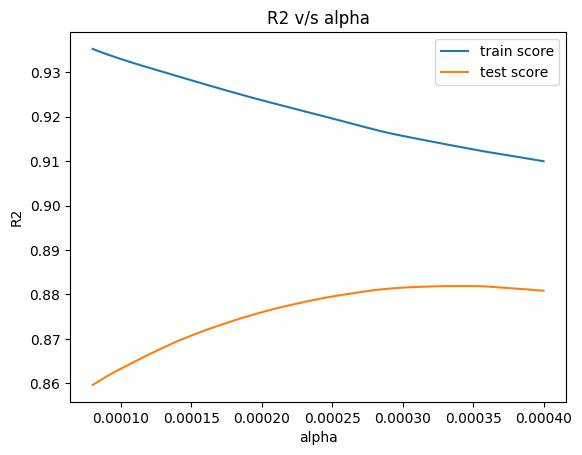

In [155]:
# plotting mean test and train scores v/s alpha
cv_results_lasso=pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 v/s alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [156]:
print(model_cv_lasso.best_params_)

{'alpha': 0.0003418181818181818}


In [204]:
best_alpha_lasso= model_cv_lasso.best_params_['alpha']
lasso = Lasso(alpha=best_alpha_lasso)

lasso.fit(X_train, y_train)


Lasso(alpha=0.0003418181818181818)

In [158]:
print(lasso.coef_)

[-8.25196078e-03  0.00000000e+00  8.89411399e-02  1.69920650e-01
  9.05752446e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.62206017e-01
 -0.00000000e+00  1.87617816e-02  2.33403437e-03  0.00000000e+00
 -0.00000000e+00  9.56235036e-04  7.42806270e-02  0.00000000e+00
  1.97296421e-02  1.51252717e-03  0.00000000e+00  0.00000000e+00
  1.74795506e-02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -5.65901579e-02  0.00000000e+00  0.00000000e+00  4.18392621e-03
 -1.50466524e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.70557679e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.76569648e-03 -0.00000000e+00  9.60048141e-03
 -3.02570100e-03 -0.00000000e+00 -3.04658797e-03  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  9.50403219e-03 -0.00000000e+00  2.99164974e-02 -1.95658270e-02
 -0.00000000e+00 -1.06012229e-03 -0.00000000e+00 -0.00000000e+00
 -1.46090269e-03 -0.00000

In [211]:
# Let's also see other scores like RSS(Residual Sum of Squares), MSE (MeanSquaredError)
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metric = []
r2_train_lasso = r2_score(y_train, y_pred_train)
r2_test_lasso = r2_score(y_test, y_pred_test)
rss_train_lasso = np.sum(np.square(y_train - y_pred_train))
rss_test_lasso = np.sum(np.square(y_test - y_pred_test))
mse_train_lasso = mean_squared_error(y_train, y_pred_train)
mse_test_lasso = mean_squared_error(y_test, y_pred_test)

lasso_metric.append(r2_train_lasso)
lasso_metric.append(r2_test_lasso)
lasso_metric.append(rss_train_lasso)
lasso_metric.append(rss_test_lasso)
lasso_metric.append(mse_train_lasso**0.5)
lasso_metric.append(mse_test_lasso**0.5)

print('Best Hyperparameter value alpha for Lasso =',best_alpha_lasso)
print("R2 Score for Training data  : ",r2_train_lasso)
print("R2 Score for Test data      : ",r2_test_lasso)
print("RSS Score for Training data : ",rss_train_lasso)
print("RSS Score for Test data     : ",rss_test_lasso)
print("RMSE Score for Training data : ",mse_train_lasso**0.5)
print("RMSE Score for Test data     : ",mse_test_lasso**0.5)


Best Hyperparameter value alpha for Lasso = 0.0003418181818181818
R2 Score for Training data  :  0.9116279967613407
R2 Score for Test data      :  0.886119567370196
RSS Score for Training data :  1.5134988474295845
RSS Score for Test data     :  0.8345006371319992
RMSE Score for Training data :  0.038501546675491854
RMSE Score for Test data     :  0.04364919926174796


In [212]:
comparison_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': lm_metric,
        'Ridge Regression': ridge_metric,
        'Lasso Regression': lasso_metric
        }

comparison_df = pd.DataFrame(comparison_table)
comparison_df

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.509079e-01          0.922864          0.911628
1   R2 Score (Test)      -1.519314e+20          0.871653          0.886120
2       RSS (Train)       8.407730e-01          1.321074          1.513499
3        RSS (Test)       1.113333e+21          0.940510          0.834501
4      RMSE (Train)       2.869634e-02          0.035971          0.038502
5       RMSE (Test)       1.594320e+09          0.046339          0.043649

In [165]:
print('Best hyperparameter value (alpha) for Ridge regression =',best_alpha_ridge)
print('Best hyperparameter value (alpha) for Lasso regression =',best_alpha_lasso)

Best hyperparameter value (alpha) for Ridge regression = 4.7272727272727275
Best hyperparameter value (alpha) for Lasso regression = 0.0003418181818181818


As we can observe from the above comparison matrix of R2 (R-Squared) values of Linear V/s Ridge V/s Lasso
- The difference between Train and Test R2 scores for Lasso (0.0255) is least followed by Ridge (0.051)
- And the similar pattern is observed for other metrics as well like RSS & MSE (Lower the value of metric, better the model performance)
- Linear regression model although performed better and has the highest R2(R-squared) value for Train among the three models, its performance against test dataset is horrible. We can say that Linear regression model overfit the data to all the parameters.

Top 15 influencing features of Ridge and Lasso Regression

In [172]:
coeff_df = pd.DataFrame({'features':X_train.columns})
coeff_df

features
0               MSSubClass
1              LotFrontage
2                  LotArea
3              OverallQual
4              OverallCond
..                     ...
247  SaleCondition_AdjLand
248   SaleCondition_Alloca
249   SaleCondition_Family
250   SaleCondition_Normal
251  SaleCondition_Partial

[252 rows x 1 columns]

In [175]:
coeff_df['Ridge Regression'] = ridge.coef_
coeff_df['Lasso Regression'] = lasso.coef_

In [184]:
coeff_df.sort_values(by='Ridge Regression',ascending=False).head(15)

features  Ridge Regression  Lasso Regression
11              GrLivArea          0.147498          0.362206
3             OverallQual          0.108400          0.169921
4             OverallCond          0.069127          0.090575
2                 LotArea          0.064501          0.088941
13               FullBath          0.062516          0.018762
18             GarageCars          0.053142          0.074281
15           BedroomAbvGr          0.045558          0.000000
70   Neighborhood_StoneBr          0.043552          0.026515
54   Neighborhood_Crawfor          0.037002          0.029916
110      RoofMatl_WdShngl          0.034894          0.000000
63   Neighborhood_NoRidge          0.032340          0.023687
188          CentralAir_Y          0.031783          0.026394
113   Exterior1st_BrkFace          0.030803          0.022501
64   Neighborhood_NridgHt          0.029724          0.022873
9             TotalBsmtSF          0.029600          0.000000

In [183]:
coeff_df.sort_values(by='Lasso Regression',ascending=False).head(15)

features  Ridge Regression  Lasso Regression
11              GrLivArea          0.147498          0.362206
3             OverallQual          0.108400          0.169921
4             OverallCond          0.069127          0.090575
2                 LotArea          0.064501          0.088941
18             GarageCars          0.053142          0.074281
244          SaleType_New          0.023099          0.029948
54   Neighborhood_Crawfor          0.037002          0.029916
70   Neighborhood_StoneBr          0.043552          0.026515
188          CentralAir_Y          0.031783          0.026394
63   Neighborhood_NoRidge          0.032340          0.023687
64   Neighborhood_NridgHt          0.029724          0.022873
113   Exterior1st_BrkFace          0.030803          0.022501
20             WoodDeckSF          0.028412          0.019730
13               FullBath          0.062516          0.018762
74        Condition1_Norm          0.019458          0.018654

In [191]:
print('Lasso Regression number of non-zero co-efficient features:',(coeff_df['Lasso Regression']!=0).sum())
print('Ridge Regression number of non-zero co-efficient features:',(coeff_df['Ridge Regression']!=0).sum())
print('Total Number of features in the provided training dataset:', len(X_train.columns))

Lasso Regression number of non-zero co-efficient features: 73
Ridge Regression number of non-zero co-efficient features: 246
Total Number of features in the provided training dataset: 252


- In Ridge regression, usually the model penalizes the features severely for less important features leading towards zero, but doesn't make the coefficients(betas) zeros.
- On the other hand, In Lasso Regression, the co-efficients will be zero for less important features, as can be observed from the above output only 73 features out of 252 have been considered for prediction.

In [195]:
Top15features_lasso = coeff_df.sort_values(by='Lasso Regression',ascending=False).head(15)['features']
Top15features_lasso

11                GrLivArea
3               OverallQual
4               OverallCond
2                   LotArea
18               GarageCars
244            SaleType_New
54     Neighborhood_Crawfor
70     Neighborhood_StoneBr
188            CentralAir_Y
63     Neighborhood_NoRidge
64     Neighborhood_NridgHt
113     Exterior1st_BrkFace
20               WoodDeckSF
13                 FullBath
74          Condition1_Norm
Name: features, dtype: object

In [196]:
Top15features_ridge = coeff_df.sort_values(by='Ridge Regression',ascending=False).head(15)['features']
Top15features_ridge

11                GrLivArea
3               OverallQual
4               OverallCond
2                   LotArea
13                 FullBath
18               GarageCars
15             BedroomAbvGr
70     Neighborhood_StoneBr
54     Neighborhood_Crawfor
110        RoofMatl_WdShngl
63     Neighborhood_NoRidge
188            CentralAir_Y
113     Exterior1st_BrkFace
64     Neighborhood_NridgHt
9               TotalBsmtSF
Name: features, dtype: object

In [199]:
# Top common features in both Lasso & Ridge models in no order
list(set(Top15features_ridge)&set(Top15features_lasso))

['Neighborhood_NoRidge',
 'GarageCars',
 'FullBath',
 'Exterior1st_BrkFace',
 'CentralAir_Y',
 'OverallQual',
 'OverallCond',
 'GrLivArea',
 'Neighborhood_NridgHt',
 'LotArea',
 'Neighborhood_Crawfor',
 'Neighborhood_StoneBr']

---
---


### Assignment Part-2

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ans:

Optimal hyperparameter value (alpha) for Ridge regression = 4.7272727272727275 <br>
Optimal hyperparameter value (alpha) for Lasso regression = 0.0003418181818181818

In [202]:
alphax2_lasso = best_alpha_lasso*2
alphax2_ridge = best_alpha_ridge*2
print(alphax2_lasso,alphax2_ridge)

0.0006836363636363636 9.454545454545455


In [205]:
# Training model for lasso

lasso_assignment = Lasso(alpha=alphax2_lasso)
lasso_assignment.fit(X_train, y_train)

Lasso(alpha=0.0006836363636363636)

In [206]:
# Training model for Ridge

ridge_assignment = Ridge(alpha=alphax2_ridge)
ridge_assignment.fit(X_train, y_train)

Ridge(alpha=9.454545454545455)

In [207]:
coeff_dfX2 = pd.DataFrame({'features':X_train.columns})
coeff_dfX2['Lasso Regression(doubled alpha)'] = lasso_assignment.coef_
coeff_dfX2['Ridge Regression(doubled alpha)'] = ridge_assignment.coef_
coeff_dfX2

features  Lasso Regression(doubled alpha)  \
0               MSSubClass                        -0.006047   
1              LotFrontage                         0.000000   
2                  LotArea                         0.070506   
3              OverallQual                         0.189821   
4              OverallCond                         0.069656   
..                     ...                              ...   
247  SaleCondition_AdjLand                         0.000000   
248   SaleCondition_Alloca                        -0.000000   
249   SaleCondition_Family                        -0.000000   
250   SaleCondition_Normal                         0.008493   
251  SaleCondition_Partial                         0.000000   

     Ridge Regression(doubled alpha)  
0                          -0.010512  
1                           0.019450  
2                           0.050666  
3                           0.090008  
4                           0.057230  
..                               ...  
247                         0.008007  
248                         0.009548  
249                        -0.007829  
250                         0.020252  
251                         0.007932  

[252 rows x 3 columns]

In [213]:
# Let's also see other scores like RSS(Residual Sum of Squares), RMSE (RootMeanSquaredError)
y_pred_train_assignment= lasso_assignment.predict(X_train)
y_pred_test_assignment = lasso_assignment.predict(X_test)

r2_train_lasso_assignment = r2_score(y_train, y_pred_train_assignment)
r2_test_lasso_assignment = r2_score(y_test, y_pred_test_assignment)
rss_train_lasso_assignment = np.sum(np.square(y_train - y_pred_train_assignment))
rss_test_lasso_assignment = np.sum(np.square(y_test - y_pred_test_assignment))
mse_train_lasso_assignment = mean_squared_error(y_train, y_pred_train_assignment)
mse_test_lasso_assignment = mean_squared_error(y_test, y_pred_test_assignment)

print("R2 Score for Training data  : ",r2_train_lasso_assignment)
print("R2 Score for Test data      : ",r2_test_lasso_assignment)
print("RSS Score for Training data : ",rss_train_lasso_assignment)
print("RSS Score for Test data     : ",rss_test_lasso_assignment)
print("MSE Score for Training data : ",mse_train_lasso_assignment**0.5)
print("MSE Score for Test data     : ",mse_test_lasso_assignment**0.5)


R2 Score for Training data  :  0.8932582952800864
R2 Score for Test data      :  0.8728714486321567
RSS Score for Training data :  1.8281066530761283
RSS Score for Test data     :  0.9315810860940519
MSE Score for Training data :  0.04231437139458915
MSE Score for Test data     :  0.04611829850325937


In [214]:
# Let's also see other scores like RSS(Residual Sum of Squares), RMSE (RootMeanSquaredError)
y_pred_train_assignment= ridge_assignment.predict(X_train)
y_pred_test_assignment = ridge_assignment.predict(X_test)

r2_train_ridge_assignment = r2_score(y_train, y_pred_train_assignment)
r2_test_ridge_assignment = r2_score(y_test, y_pred_test_assignment)
rss_train_ridge_assignment = np.sum(np.square(y_train - y_pred_train_assignment))
rss_test_ridge_assignment = np.sum(np.square(y_test - y_pred_test_assignment))
mse_train_ridge_assignment = mean_squared_error(y_train, y_pred_train_assignment)
mse_test_ridge_assignment = mean_squared_error(y_test, y_pred_test_assignment)

print("R2 Score for Training data  : ",r2_train_ridge_assignment)
print("R2 Score for Test data      : ",r2_test_ridge_assignment)
print("RSS Score for Training data : ",rss_train_ridge_assignment)
print("RSS Score for Test data     : ",rss_test_ridge_assignment)
print("MSE Score for Training data : ",mse_train_ridge_assignment**0.5)
print("MSE Score for Test data     : ",mse_test_ridge_assignment**0.5)


R2 Score for Training data  :  0.9117248227745257
R2 Score for Test data      :  0.8617041469763487
RSS Score for Training data :  1.5118405613889139
RSS Score for Test data     :  1.0134135847210206
MSE Score for Training data :  0.038480448517508634
MSE Score for Test data     :  0.04810124369994795


In [215]:
coeff_dfX2.sort_values(by='Lasso Regression(doubled alpha)',ascending=False).head(15)

features  Lasso Regression(doubled alpha)  \
11              GrLivArea                         0.326115   
3             OverallQual                         0.189821   
18             GarageCars                         0.083341   
2                 LotArea                         0.070506   
4             OverallCond                         0.069656   
188          CentralAir_Y                         0.031028   
244          SaleType_New                         0.024070   
64   Neighborhood_NridgHt                         0.015988   
74        Condition1_Norm                         0.015581   
54   Neighborhood_Crawfor                         0.014932   
163       BsmtExposure_Gd                         0.014479   
151      Foundation_PConc                         0.013067   
227          PavedDrive_Y                         0.011820   
20             WoodDeckSF                         0.011365   
13               FullBath                         0.011357   

     Ridge Regression(doubled alpha)  
11                          0.106137  
3                           0.090008  
18                          0.048514  
2                           0.050666  
4                           0.057230  
188                         0.033199  
244                         0.017845  
64                          0.026984  
74                          0.016505  
54                          0.034321  
163                         0.016427  
151                         0.014395  
227                         0.014075  
20                          0.025994  
13                          0.060838

In [216]:
Top15features_lasso_assignment = coeff_dfX2.sort_values(by='Lasso Regression(doubled alpha)',ascending=False).head(15)['features']
Top15features_ridge_assignment = coeff_dfX2.sort_values(by='Ridge Regression(doubled alpha)',ascending=False).head(15)['features']

In [217]:
print('Top 15 influencing features by Lasso Model :',Top15features_lasso)
print('Top 15 influencing features by Ridge Model :',Top15features_ridge)

Top 15 influencing features by Lasso Model : 11                GrLivArea
3               OverallQual
4               OverallCond
2                   LotArea
18               GarageCars
244            SaleType_New
54     Neighborhood_Crawfor
70     Neighborhood_StoneBr
188            CentralAir_Y
63     Neighborhood_NoRidge
64     Neighborhood_NridgHt
113     Exterior1st_BrkFace
20               WoodDeckSF
13                 FullBath
74          Condition1_Norm
Name: features, dtype: object
Top 15 influencing features by Ridge Model : 11                GrLivArea
3               OverallQual
4               OverallCond
2                   LotArea
13                 FullBath
18               GarageCars
15             BedroomAbvGr
70     Neighborhood_StoneBr
54     Neighborhood_Crawfor
110        RoofMatl_WdShngl
63     Neighborhood_NoRidge
188            CentralAir_Y
113     Exterior1st_BrkFace
64     Neighborhood_NridgHt
9               TotalBsmtSF
Name: features, dtype: object


---
Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [223]:
X_train_q3 = X_train.drop(['GrLivArea','OverallCond','OverallQual','LotArea','GarageCars'],axis=1)
X_test_q3= X_test.drop(['GrLivArea','OverallCond','OverallQual','LotArea','GarageCars'],axis=1)
y_train_q3 = y_train
y_test_q3 = y_test
X_test_q3

MSSubClass  LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
14      0.000000     0.519255    0.153846    0.129872    0.000000   0.222603   
1248    0.323529     0.466412    0.000000    0.056520    0.000000   0.178082   
674     0.000000     0.573315    0.000000    0.158044    0.000000   0.104452   
164     0.117647     0.302236    0.000000    0.065556    0.000000   0.333476   
1006    0.000000     0.519255    0.000000    0.219171    0.000000   0.179795   
...          ...          ...         ...         ...         ...        ...   
1220    0.000000     0.502640    0.000000    0.055280    0.407056   0.000000   
219     0.588235     0.332802    0.011611    0.002835    0.000000   0.527397   
1311    0.000000     0.513817    0.058055    0.163891    0.000000   0.149401   
33      0.000000     0.524596    0.000000    0.180369    0.000000   0.162671   
149     0.176471     0.519255    0.000000    0.000000    0.000000   0.383562   

      TotalBsmtSF  LowQualFinSF  BsmtHalfBath  FullBath  HalfBath  \
14       0.205074           0.0           0.0  0.333333       0.5   
1248     0.120295           0.0           0.0  0.333333       0.5   
674      0.185925           0.0           0.0  0.333333       0.0   
164      0.188052           0.0           0.0  0.666667       0.0   
1006     0.271195           0.0           0.5  0.666667       0.0   
...           ...           ...           ...       ...       ...   
1220     0.149264           0.0           0.0  0.333333       0.0   
219      0.204255           0.0           0.0  0.666667       0.0   
1311     0.208511           0.0           0.0  0.666667       0.0   
33       0.228805           0.0           0.5  0.333333       0.5   
149      0.146645           0.0           0.0  0.333333       0.0   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
14           0.250           0.0    0.333333    0.248237    0.000000   
1248         0.375           0.0    0.333333    0.279267    0.000000   
674          0.375           0.0    0.333333    0.270804    0.578804   
164          0.375           0.0    0.000000    0.152327    0.000000   
1006         0.375           0.0    0.333333    0.341326    0.000000   
...            ...           ...         ...         ...         ...   
1220         0.250           0.0    0.000000    0.203103    0.000000   
219          0.250           0.0    0.000000    0.308886    0.146739   
1311         0.375           0.0    0.000000    0.358251    0.358696   
33           0.500           0.0    0.333333    0.315233    0.000000   
149          0.375           0.0    0.000000    0.169252    0.271739   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
14       0.424303       0.318841        0.0     0.000000       0.0      0.0   
1248     0.000000       0.469203        0.0     0.000000       0.0      0.0   
674      0.000000       0.000000        0.0     0.000000       0.0      0.0   
164      0.000000       0.331522        0.0     0.000000       0.0      0.0   
1006     0.000000       0.000000        0.0     0.358537       0.0      0.0   
...           ...            ...        ...          ...       ...      ...   
1220     0.000000       0.000000        0.0     0.000000       0.0      0.0   
219      0.000000       0.000000        0.0     0.000000       0.0      0.0   
1311     0.195219       0.000000        0.0     0.000000       0.0      0.0   
33       0.075697       0.000000        0.0     0.000000       0.0      0.0   
149      0.227092       0.000000        0.0     0.000000       0.0      0.0   

        MoSold       Age  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
14    0.363636  0.352941            0            0            1            0   
1248  0.272727  0.669118            0            0            0            1   
674   0.545455  0.316176            0            0            1            0   
164   0.818182  0.595588            0            0            0            1   
10

In [224]:
X_train_q3

MSSubClass  LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
744     0.588235     0.312739    0.000000    0.129872    0.000000   0.258562   
138     0.235294     0.540070    0.232221    0.118356    0.000000   0.143836   
425     0.235294     0.466412    0.000000    0.000000    0.000000   0.278682   
835     0.000000     0.466412    0.000000    0.078313    0.000000   0.267551   
1269    0.176471     0.564193    0.130624    0.081502    0.000000   0.177226   
...          ...          ...         ...         ...         ...        ...   
123     0.588235     0.432594    0.000000    0.053154    0.000000   0.384846   
34      0.588235     0.466412    0.178520    0.204288    0.000000   0.174658   
510     0.000000     0.549956    0.050798    0.115167    0.122117   0.076199   
1199    0.000000     0.549956    0.037010    0.096917    0.000000   0.215753   
16      0.000000     0.519255    0.130624    0.102410    0.000000   0.182363   

      TotalBsmtSF  LowQualFinSF  BsmtHalfBath  FullBath  HalfBath  \
744      0.218822           0.0           0.0  0.666667       0.0   
138      0.164321           0.0           0.0  0.666667       0.5   
425      0.106547           0.0           0.0  0.333333       0.5   
835      0.174632           0.0           0.0  0.666667       0.0   
1269     0.143044           0.0           0.0  0.333333       0.5   
...           ...           ...           ...       ...       ...   
123      0.196236           0.0           0.0  0.666667       0.0   
34       0.255483           0.0           0.0  0.666667       0.0   
510      0.164975           0.0           0.0  0.333333       0.0   
1199     0.172013           0.0           0.0  0.333333       0.5   
16       0.164321           0.0           0.0  0.333333       0.0   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
744          0.250           0.0    0.333333    0.325811    0.130435   
138          0.375           0.0    0.666667    0.465444    0.304348   
425          0.375           0.0    0.666667    0.169252    0.000000   
835          0.250           0.0    0.000000    0.307475    0.394022   
1269         0.375           0.0    0.000000    0.222144    0.000000   
...            ...           ...         ...         ...         ...   
123          0.250           0.0    0.000000    0.373766    0.000000   
34           0.250           0.0    0.333333    0.392102    0.275815   
510          0.250           0.0    0.666667    0.203103    0.440217   
1199         0.375           0.0    0.333333    0.323695    0.000000   
16           0.250           0.0    0.333333    0.338505    0.000000   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
744      0.000000       0.126812   0.412776     0.000000       0.0  0.000000   
138      0.211155       0.000000   0.000000     0.000000       0.0  0.000000   
425      0.000000       0.228261   0.000000     0.000000       0.0  0.000000   
835      0.000000       0.000000   0.000000     0.000000       0.0  0.000000   
1269     0.000000       0.000000   0.000000     0.000000       0.0  0.000000   
...           ...            ...        ...          ...       ...       ...   
123      0.125498       0.000000   0.000000     0.000000       0.0  0.000000   
34       0.093625       0.000000   0.000000     0.000000       0.0  0.000000   
510      0.083665       0.000000   0.000000     0.409756       0.0  0.240964   
1199     0.163347       0.000000   0.000000     0.000000       0.0  0.000000   
16       0.000000       0.000000   0.000000     0.000000       0.0  0.084337   

        MoSold       Age  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
744   0.818182  0.110294            0            0            1            0   
138   1.000000  0.066176            0            0            1            0   
425   0.727273  0.463235            0            0            0            1   
835   0.090909  0.441176            0            0            1       

In [225]:
lasso_q3 = Lasso()
folds = 10
model_cv_lasso_q3 = GridSearchCV(estimator = lasso_q3,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv_lasso_q3.fit(X_train_q3, y_train_q3)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


c:\CustInstallation\epgpEnv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.226e-01, tolerance: 1.550e-03
  model = cd_fast.enet_coordinate_descent(
c:\CustInstallation\epgpEnv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.550e-01, tolerance: 1.570e-03
  model = cd_fast.enet_coordinate_descent(
c:\CustInstallation\epgpEnv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.661e-01,

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='r2', verbose=1)

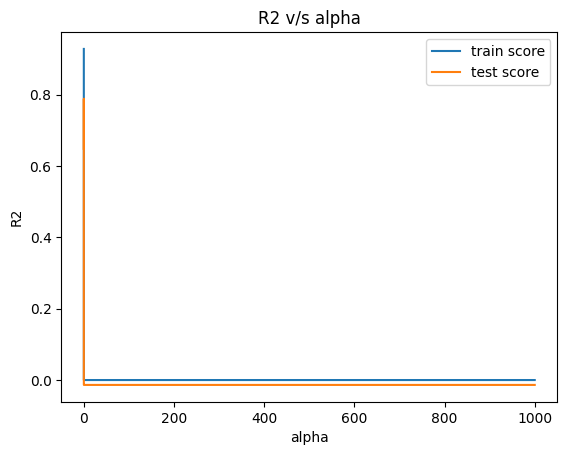

In [226]:
# plotting mean test and train scores v/s alpha
cv_results_lasso_q3=pd.DataFrame(model_cv_lasso_q3.cv_results_)
cv_results_lasso_q3['param_alpha'] = cv_results_lasso_q3['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso_q3['param_alpha'], cv_results_lasso_q3['mean_train_score'])
plt.plot(cv_results_lasso_q3['param_alpha'], cv_results_lasso_q3['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 v/s alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [227]:
print(model_cv_lasso_q3.best_params_)

{'alpha': 0.0001}


In [236]:
params_refined_q3 = {'alpha':np.linspace(0.00005,0.0005,100)}
# params_refined_q3

{'alpha': array([5.00000000e-05, 5.45454545e-05, 5.90909091e-05, 6.36363636e-05,
        6.81818182e-05, 7.27272727e-05, 7.72727273e-05, 8.18181818e-05,
        8.63636364e-05, 9.09090909e-05, 9.54545455e-05, 1.00000000e-04,
        1.04545455e-04, 1.09090909e-04, 1.13636364e-04, 1.18181818e-04,
        1.22727273e-04, 1.27272727e-04, 1.31818182e-04, 1.36363636e-04,
        1.40909091e-04, 1.45454545e-04, 1.50000000e-04, 1.54545455e-04,
        1.59090909e-04, 1.63636364e-04, 1.68181818e-04, 1.72727273e-04,
        1.77272727e-04, 1.81818182e-04, 1.86363636e-04, 1.90909091e-04,
        1.95454545e-04, 2.00000000e-04, 2.04545455e-04, 2.09090909e-04,
        2.13636364e-04, 2.18181818e-04, 2.22727273e-04, 2.27272727e-04,
        2.31818182e-04, 2.36363636e-04, 2.40909091e-04, 2.45454545e-04,
        2.50000000e-04, 2.54545455e-04, 2.59090909e-04, 2.63636364e-04,
        2.68181818e-04, 2.72727273e-04, 2.77272727e-04, 2.81818182e-04,
        2.86363636e-04, 2.90909091e-04, 2.95454545e-04,

In [237]:
lasso_q3 = Lasso()
folds = 10
model_cv_lasso_q3 = GridSearchCV(estimator = lasso_q3,
                        param_grid = params_refined_q3,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv_lasso_q3.fit(X_train_q3, y_train_q3)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([5.00000000e-05, 5.45454545e-05, 5.90909091e-05, 6.36363636e-05,
       6.81818182e-05, 7.27272727e-05, 7.72727273e-05, 8.18181818e-05,
       8.63636364e-05, 9.09090909e-05, 9.54545455e-05, 1.00000000e-04,
       1.04545455e-04, 1.09090909e-04, 1.13636364e-04, 1.18181818e-04,
       1.22727273e-04, 1.27272727e-04, 1.31818182e-04, 1...
       4.13636364e-04, 4.18181818e-04, 4.22727273e-04, 4.27272727e-04,
       4.31818182e-04, 4.36363636e-04, 4.40909091e-04, 4.45454545e-04,
       4.50000000e-04, 4.54545455e-04, 4.59090909e-04, 4.63636364e-04,
       4.68181818e-04, 4.72727273e-04, 4.77272727e-04, 4.81818182e-04,
       4.86363636e-04, 4.90909091e-04, 4.95454545e-04, 5.00000000e-04])},
             return_train_score=True, scoring='r2', verbose=1)

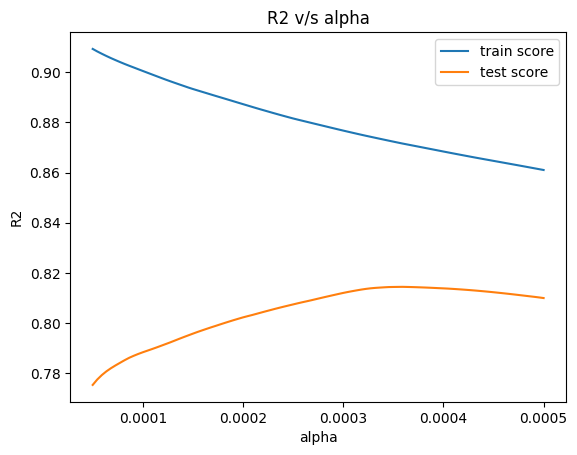

In [238]:
# plotting mean test and train scores v/s alpha
cv_results_lasso_q3=pd.DataFrame(model_cv_lasso_q3.cv_results_)
cv_results_lasso_q3['param_alpha'] = cv_results_lasso_q3['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso_q3['param_alpha'], cv_results_lasso_q3['mean_train_score'])
plt.plot(cv_results_lasso_q3['param_alpha'], cv_results_lasso_q3['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 v/s alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [239]:
print(model_cv_lasso_q3.best_params_)

{'alpha': 0.0003590909090909091}


In [240]:
lasso_q3 = Lasso(alpha=0.00035909)
lasso_q3.fit(X_train_q3,y_train_q3)

Lasso(alpha=0.00035909)

In [241]:
coeff_df_q3 = pd.DataFrame({'features':X_train_q3.columns})
coeff_df_q3['Lasso Regression Ques-3'] = lasso_q3.coef_
coeff_df_q3

features  Lasso Regression Ques-3
0               MSSubClass                -0.000000
1              LotFrontage                 0.031044
2               MasVnrArea                 0.000000
3               BsmtFinSF1                 0.000000
4               BsmtFinSF2                 0.000000
..                     ...                      ...
242  SaleCondition_AdjLand                 0.000000
243   SaleCondition_Alloca                 0.000000
244   SaleCondition_Family                -0.000000
245   SaleCondition_Normal                 0.019313
246  SaleCondition_Partial                 0.000000

[247 rows x 2 columns]

In [242]:
# Let's also see other scores like RSS(Residual Sum of Squares), RMSE (RootMeanSquaredError)
y_pred_train_q3= lasso_q3.predict(X_train_q3)
y_pred_test_q3 = lasso_q3.predict(X_test_q3)

r2_train_lasso_q3 = r2_score(y_train_q3, y_pred_train_q3)
r2_test_lasso_q3 = r2_score(y_test_q3, y_pred_test_q3)
rss_train_lasso_q3 = np.sum(np.square(y_train_q3 - y_pred_train_q3))
rss_test_lasso_q3 = np.sum(np.square(y_test_q3 - y_pred_test_q3))
mse_train_lasso_q3 = mean_squared_error(y_train_q3, y_pred_train_q3)
mse_test_lasso_q3 = mean_squared_error(y_test_q3, y_pred_test_q3)

print("R2 Score for Training data  : ",r2_train_lasso_q3)
print("R2 Score for Test data      : ",r2_test_lasso_q3)
print("RSS Score for Training data : ",rss_train_lasso_q3)
print("RSS Score for Test data     : ",rss_test_lasso_q3)
print("MSE Score for Training data : ",mse_train_lasso_q3**0.5)
print("MSE Score for Test data     : ",mse_test_lasso_q3**0.5)

R2 Score for Training data  :  0.8683743225416002
R2 Score for Test data      :  0.8165522203542067
RSS Score for Training data :  2.25428081094214
RSS Score for Test data     :  1.344280887064352
MSE Score for Training data :  0.046988451818003436
MSE Score for Test data     :  0.05539976936190621


In [244]:
coeff_df_q3.sort_values(by='Lasso Regression Ques-3',ascending=False).head(20)

features  Lasso Regression Ques-3
9                FullBath                 0.119419
14             GarageArea                 0.100814
6             TotalBsmtSF                 0.093516
11           BedroomAbvGr                 0.077671
49   Neighborhood_Crawfor                 0.056297
183          CentralAir_Y                 0.056090
65   Neighborhood_StoneBr                 0.049969
58   Neighborhood_NoRidge                 0.042436
10               HalfBath                 0.042370
16            OpenPorchSF                 0.037201
59   Neighborhood_NridgHt                 0.036474
108   Exterior1st_BrkFace                 0.032746
13             Fireplaces                 0.032699
1             LotFrontage                 0.031044
15             WoodDeckSF                 0.029548
19            ScreenPorch                 0.027708
239          SaleType_New                 0.027163
158       BsmtExposure_Gd                 0.021292
38      LotConfig_CulDSac                 0.020172
245  SaleCondition_Normal                 0.019313